# Proyecto: Análisis de la Calidad del Aire en Palma de Mallorca

## Introducción:

Para analizar la calidad del aire en **Palma de Mallorca**, utilizaremos inicialmente **dos datasets** provenientes de estaciones de monitoreo gestionadas por el **Govern de les Illes Balears**:

1. **Estación Bellver**:
   - Ubicada en el parque de Bellver, en un entorno natural.
2. **Estación Foners**:
   - Ubicada en la calle Foners, en el centro de la ciudad.

Ambos datasets contienen datos de contaminantes en unidades de **microgramos por metro cúbico (µg/m³)**.

---

## Objetivos del Proyecto:

1. **Proporcionar Insights Relevantes**:
   - Analizar la calidad del aire en Palma de Mallorca mediante un **análisis de datos** en Python y **visualizaciones** en Seaborn.
   - Identificar patrones **estacionales** o **interanuales** en los datos para comprender mejor la situación actual.

2. **Predicción de Niveles de Contaminantes**:
   - Implementar un modelo de **deep learning** con **PyTorch** para predecir niveles de contaminantes utilizando datos de varios años.

3. **Contextualización con Factores Externos**:
   - Analizar otros factores relacionados que puedan proporcionar un contexto adicional a los datos.

---

## Impacto Esperado:

Al cumplir estos objetivos, el proyecto proporcionará una comprensión más profunda de los factores ambientales en Palma de Mallorca. Esto puede convertirse en información valiosa para la toma de decisiones en empresas, especialmente en iniciativas relacionadas con la **responsabilidad social corporativa**.

---

## Preprocesamiento de los Datos:

1. **Columnas Comunes**:
   - Las dos estaciones no miden exactamente las mismas variables. Por lo tanto, se seleccionarán únicamente las **columnas comunes** entre ambos datasets para garantizar consistencia en el análisis.

2. **Eliminación de Columnas de Validación**:
   - Algunas columnas contienen valores **"V" (validado)** y **"N" (no validado)**. Para evitar confusiones en las métricas posteriores, estas columnas serán eliminadas.

3. **Renombrado de Columnas**:
   - En esta primera aproximación, los nombres de las columnas se modificarán para reflejar con mayor claridad sus significados reales.

---

Con este preprocesamiento inicial, los datos estarán listos para comenzar el análisis exploratorio y la implementación de los modelos predictivos.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel('bellver.xls')
df_foners = pd.read_excel('foners2023.xls')

common_columns = df.columns.intersection(df_foners.columns)


df = df[common_columns]
df_foners = df_foners[common_columns]

def process_dataframe(df, rename_dict):

    original_types = df.dtypes.to_dict()

    cols_to_drop = []
    for column in df.columns:
        # Convertir a string para garantizar que el método .str esté disponible
        if df[column].astype(str).str.contains('V|N', regex=True).any():
            cols_to_drop.append(column)
    
    df.drop(columns=cols_to_drop, inplace=True)
    
    df.rename(columns=rename_dict, inplace=True)

    for col, dtype in original_types.items():
        if col in df.columns:
            df[col] = df[col].astype(dtype)
    
    return df

rename_dict = {
    'FECHA_HI': 'fecha',
    'PERIODO_HI': 'hora',
    'SO2_HI': 'dioxido_azufre',
    'FL_SO2': 'flujo_dioxido_azufre',
    'NO_HI': 'oxido_nitrico',
    'FL_NO': 'flujo_oxido_nitrico',
    'NO2_HI': 'dioxido_nitrogeno',
    'FL_NO2': 'flujo_dioxido_nitrogeno',
    'O3_HI': 'ozono',
    'FL_O3': 'flujo_ozono',
    'PM10_HI': 'particulas_pm10',
    'FL_PM10': 'flujo_particulas_pm10',
    'DD_HI': 'direccion_viento',
    'FL_DD': 'flujo_direccion_viento',
    'VV_HI': 'velocidad_viento',
    'FL_VV': 'flujo_velocidad_viento',
    'TMP_HI': 'temperatura',
    'FL_TMP': 'flujo_temperatura',
    'HR_HI': 'humedad_relativa',
    'FL_HR': 'flujo_humedad_relativa',
    'LL_HI': 'lluvia',
    'FL_LL': 'flujo_lluvia',
    'NOX_HI': 'oxidos_nitrogeno',
    'FL_NOX': 'flujo_oxidos_nitrogeno'
}


df = process_dataframe(df, rename_dict)

df_foners = process_dataframe(df_foners, rename_dict)

print("Columnas de df después de procesar:")
print(df.dtypes)  
print("\nColumnas de df_foners después de procesar:")
print(df_foners.dtypes)  
df.head(5)

Columnas de df después de procesar:
fecha                datetime64[ns]
hora                         object
dioxido_azufre              float64
oxido_nitrico               float64
dioxido_nitrogeno           float64
ozono                       float64
particulas_pm10             float64
direccion_viento            float64
velocidad_viento            float64
temperatura                 float64
humedad_relativa            float64
lluvia                      float64
oxidos_nitrogeno            float64
dtype: object

Columnas de df_foners después de procesar:
fecha                datetime64[ns]
hora                         object
dioxido_azufre              float64
oxido_nitrico               float64
dioxido_nitrogeno           float64
ozono                       float64
particulas_pm10             float64
direccion_viento            float64
velocidad_viento            float64
temperatura                 float64
humedad_relativa            float64
lluvia                      float64
oxidos

fecha      hora  dioxido_azufre  oxido_nitrico  dioxido_nitrogeno  \
0 2023-01-01  00:00:00             2.0            1.0                2.0   
1 2023-01-01  01:00:00             2.0            1.0                2.0   
2 2023-01-01  02:00:00             2.0            1.0                2.0   
3 2023-01-01  03:00:00             2.0            1.0                2.0   
4 2023-01-01  04:00:00             2.0            1.0                2.0   

   ozono  particulas_pm10  direccion_viento  velocidad_viento  temperatura  \
0   58.0             65.0             348.0               1.0         13.7   
1   59.0             47.0             260.0               1.1         13.7   
2   58.0             42.0             268.0               1.3         13.4   
3   59.0             40.0             245.0               1.5         13.8   
4   61.0             33.0             342.0               1.1         14.5   

   humedad_relativa  lluvia  oxidos_nitrogeno  
0              90.0     0.0               2.8  
1              85.0     0.0               2.1  
2              82.0     0.0               1.3  
3              82.0     0.0               1.1  
4              78.0     0.0               0.9

Las mediciones en el dataset son cada hora lo que aporta unos datos muy ricos pero al mismo tiempo mucha complejidad. Para poder trabajar mejor con los datos se agrupan por día y se hace una media de los valores.


In [2]:
df['fecha'] = pd.to_datetime(df['fecha'])

df['dia'] = df['fecha'].dt.date

daily_mean_df = df.groupby('dia').mean(numeric_only=True).reset_index()


Al analizar los datos faltantes vemos que faltan 35 valores de información sobre lluvia. En este tipo de escenarios en los que usamos datasets con secuencias temporales para no perder la uniformidad de los valores en vez de eliminar filas se imputarán usando el método Relleno hacia adelante (Forward Fill), este rellena los valores faltantes utilizando el último valor conocido. Con el dataset de la calle Foners se procederá al mismo tipo de imputación en el caso de faltar datos. 

In [3]:
daily_mean_df.isna().sum()

dia                   0
dioxido_azufre        0
oxido_nitrico         0
dioxido_nitrogeno     0
ozono                 0
particulas_pm10       0
direccion_viento      0
velocidad_viento      0
temperatura           0
humedad_relativa      0
lluvia               35
oxidos_nitrogeno      0
dtype: int64

In [4]:
daily_mean_df = daily_mean_df.ffill()
daily_mean_df.isna().sum()

dia                  0
dioxido_azufre       0
oxido_nitrico        0
dioxido_nitrogeno    0
ozono                0
particulas_pm10      0
direccion_viento     0
velocidad_viento     0
temperatura          0
humedad_relativa     0
lluvia               0
oxidos_nitrogeno     0
dtype: int64

Se realiza la misma transformación en el dataset de Foners y se comprueban e imputan los datos faltantes: 

In [5]:
df_foners['fecha'] = pd.to_datetime(df_foners['fecha'])


df_foners['dia'] = df_foners['fecha'].dt.date


daily_mean_df_foners = df_foners.groupby('dia').mean(numeric_only=True).reset_index()



In [6]:
daily_mean_df_foners = daily_mean_df_foners.ffill()
daily_mean_df_foners.isna().sum()

dia                  0
dioxido_azufre       0
oxido_nitrico        0
dioxido_nitrogeno    0
ozono                0
particulas_pm10      0
direccion_viento     0
velocidad_viento     0
temperatura          0
humedad_relativa     0
lluvia               0
oxidos_nitrogeno     0
dtype: int64

La misma imputación se hará para los df originales, df y df_foners, si los datos ya agrupados tenían datos faltantes, obviamente los completos también. Una vez están ya imputados los datos faltantes podremos ver las métricas del conjunto de cada dataset.  Usaremos la versión con más data points para que las métricas sean más precisas. 

In [7]:
df = df.ffill()
df.describe()

fecha  dioxido_azufre  oxido_nitrico  dioxido_nitrogeno  \
count                 8760     8760.000000    8760.000000        8760.000000   
mean   2023-07-02 00:00:00        4.319635       2.059326           8.284361   
min    2023-01-01 00:00:00        2.000000       1.000000           2.000000   
25%    2023-04-02 00:00:00        2.000000       1.000000           2.000000   
50%    2023-07-02 00:00:00        5.000000       1.000000           5.000000   
75%    2023-10-01 00:00:00        6.000000       1.000000           9.000000   
max    2023-12-31 00:00:00       14.000000     159.000000          89.000000   
std                    NaN        2.114947       5.791441           9.751769   

             ozono  particulas_pm10  direccion_viento  velocidad_viento  \
count  8760.000000      8760.000000       8760.000000       8760.000000   
mean     60.497945        16.954110        181.856849          1.438744   
min       2.000000         3.000000          1.000000          0.300000   
25%      51.000000        10.000000        113.000000          0.900000   
50%      62.000000        14.000000        187.000000          1.300000   
75%      71.000000        20.000000        236.000000          1.900000   
max     117.000000       187.000000        359.000000          4.500000   
std      17.174470        12.493156         80.164690          0.692267   

       temperatura  humedad_relativa       lluvia  oxidos_nitrogeno  
count  8760.000000       8760.000000  8760.000000       8760.000000  
mean     18.994806         71.160160     0.034584         10.704167  
min       2.200000         22.000000     0.000000          0.000000  
25%      14.100000         62.000000     0.000000          3.600000  
50%      18.800000         72.000000     0.000000          5.800000  
75%      24.000000         82.000000     0.000000         10.300000  
max      37.300000         96.000000    22.250000        328.600000  
std       6.293019         13.478843     0.493002         17.384533

In [8]:
df_foners = df_foners.ffill()
df_foners.describe()

fecha  dioxido_azufre  oxido_nitrico  dioxido_nitrogeno  \
count                 8760     8760.000000    8760.000000        8760.000000   
mean   2023-07-02 00:00:00        2.711758       8.235263          23.638128   
min    2023-01-01 00:00:00        2.000000       1.000000           3.000000   
25%    2023-04-02 00:00:00        2.000000       1.000000          11.000000   
50%    2023-07-02 00:00:00        2.000000       3.000000          19.000000   
75%    2023-10-01 00:00:00        3.000000       9.100000          32.000000   
max    2023-12-31 00:00:00       21.000000     269.300000         291.000000   
std                    NaN        1.132766      16.262474          17.133595   

             ozono  particulas_pm10  direccion_viento  velocidad_viento  \
count  8760.000000      8760.000000       8760.000000       8760.000000   
mean     55.467009        20.686530        171.650571          1.750126   
min       2.000000         3.000000         11.000000          0.000000   
25%      38.000000        15.000000         82.000000          0.000000   
50%      57.000000        23.000000        177.000000          1.300000   
75%      74.000000        23.000000        228.000000          2.500000   
max     138.000000       152.000000        354.000000         17.000000   
std      25.101230         5.842856         84.532620          2.024239   

       temperatura  humedad_relativa       lluvia  oxidos_nitrogeno  
count  8760.000000       8760.000000  8760.000000       8760.000000  
mean     19.451804         69.428995     0.007446         35.758539  
min       2.900000         22.000000     0.000000          0.000000  
25%      14.500000         57.000000     0.000000         12.800000  
50%      19.200000         69.000000     0.000000         24.300000  
75%      24.700000         83.000000     0.000000         45.925000  
max      35.800000        100.000000     6.100000        483.800000  
std       6.635501         17.224380     0.104399         37.908691

Para poder comparar los datos entre las dos estaciones elegimos la media como métrica a lo largo del año. Con las medias de los dos dataframes hacemos uno nuevo que muestra los datos más cara a cara. Se investigará el significado de los datos y se obtendrán las conlusiones: 

El óxido nítrico, el óxido de nitrogeno y el dióxido de nitrogeno se consideran agentes contaminantes. Junto a las particulas en suspensión pueden producir una niebla rojiza/marrón y pueden contribuir a la formación de ozono fotoquímico. Los óxidos de nitrógeno se forman cuando se quema combustible. Las principales fuentes de NOx son los automóviles, las centrales eléctricas y otras fuentes industriales, comerciales y domésticas que queman combustibles. Por ello tiene sentido que se encuentren en Foners donde hay mayor actividad urbana. 

Fuente:

https://ec.europa.eu/health/scientific_committees/opinions_layman/es/contaminacion-aire-interior/glosario/mno/oxidos-nitrogeno-nox-oxido-nitrico-no-dioxido-nitrogeno-no2.htm

Las particulas en suspensión también suponen un riesgo para la salud. la diferencia entre las medias es notablemente más alta en Foners. Pueden ser producidas por las actividades humanas (labores agrícolas o de construcción, resuspensión de polvo, actividades industriales, etc.). 

Fuente:

https://www.miteco.gob.es/en/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/emisiones/prob-amb/particulas.html

En los demás medidores las medias son mayores en Bellver. Es interesante como el dioxido de azufre aparece en muchas más cantidad que en Foners ya que se trata de un gas antropocénico, producido por los combustibles fósiles y la industria. Según la web del Gobierno de España:

"El principal emisor de SO2 es el sector industrial, con lo cual la distribución temporal de los niveles de SO2 suele venir determinada por los periodos en los que la industria emisora que afecta a la estación está en funcionamiento."

Podemos ver en gráficos posteriores como las mediciones de este gas a partir de septiembre parecen ser muy reducidas en Foners mientras que en Bellver es la parte más activa del año. Esto podría indicar quizás que la medición en la estación urbana no fue precisa. 

Fuente:

https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/calidad-del-aire/salud/dioxido-azufre.html

"El oxidante fotoquímico más importante por su abundancia y toxicidad es el ozono (O3). Los niveles umbral de ozono, establecidos para la protección de la salud humana, la vegetación y los ecosistemas, suelen superarse en casi todos los países europeos." Como indica tambiénn la web de la Unión Europa el ozono es un gas peligroso. Curiosamente sus niveles de media son más altos también en Bellver, más alejado del núcleo urbano. 

Fuente: 

https://www.eea.europa.eu/es/publications/92-828-3351-8/page005.html

En cuánto a los niveles de viento, humedad y lluvia la situación (rural) de la estación de Bellver es una causa bastante posible de los mismos. 

In [9]:


# Seleccionar columnas numéricas comunes a ambos DataFrames
common_numeric_cols = df.select_dtypes(include=[np.number]).columns.intersection(
    df_foners.select_dtypes(include=[np.number]).columns
)

# Calcular la media de cada columna numérica para cada DataFrame
mean_df = df[common_numeric_cols].mean()
mean_df_foners = df_foners[common_numeric_cols].mean()


mean_combined_df = pd.DataFrame({
    'Bellver': mean_df.values,
    'Foners': mean_df_foners.values
}, index=common_numeric_cols)

mean_combined_df['Max'] = np.where(mean_combined_df['Bellver'] >= mean_combined_df['Foners'], 'Bellver', 'Foners')

mean_combined_df = mean_combined_df.sort_values(by='Max', ascending=False)

mean_combined_df.drop(columns='Max', inplace=True)

def highlight_max(data, color='lightblue'):
    '''
    Resalta el valor máximo de cada fila en azul.
    '''
    attr = f'background-color: {color}'
    # Crear un DataFrame de booleanos para marcar el máximo
    is_max = data == data.max(axis=1, skipna=True).values[:, None]
    # Aplicar el estilo
    return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)

# Aplicar el estilo al DataFrame
styled_df = mean_combined_df.style.apply(highlight_max, axis=None)

styled_df

Creamos un mapa de correlaciones para ver si hay variables que estén altamente correlacionadas positiva o negativamente. Se establecen las siguientes observaciones: 

1. La llamativa correlación negativa entre el ozono y los compuestos de nitrogeno: Esta correlación se da en los dos casos de estudio de forma pronunciada. Habiendo investigado puede darse por varias razones.
   1. Una serie de reacciones químicas en la atmósfera convierten los óxidos de nitrogeno , por lo que cuando uno sube es porque se ha convertido desde el otro : Fotodisociación del Dióxido de Nitrógeno (NO₂) a partir de la luz del sol se descompone en óxido nítrico (NO) y un átomo de oxígeno libre (O). Este reacciona de forma rápida con el oxígeno compuesto y forma ozono (O3). En este mismo proceso por la descomposición del dióxido, el oxido resultante puede reaccioanr con el ozono, formando otras moleculas de NO₂.
   2. Factores del ambiente, ya que el tráfico y la industria promueven los ciclos en el punto 1. Según el Gobierno de España "en ambiente urbano, generalmente más del 75% del NO2 en aire ambiente es aportado por el tráfico rodado.".
   3. El ambiente no-urbano de Bellver , es un parque a las afueras de la ciudad, puede influir ya que las plantas absorben CO₂ y emiten O₂, lo que puede afectar los niveles de ozono indirectamente, ya que el ciclo de NOx puede verse alterado en áreas con vegetación densa.
      


2. Hay un cierto grado de correlación entre la temperatura y el dióxido de azufre. Esto puede deberse a que en altas temperaturas el aire es más dinámico y se dan condiciones para la mayor dispersión de moléculas contaminantes. Aunque la correlación entre las variables sea exactamente la misma en Bellver y en Foners podemos ver como la estación de Bellver capta niveles mucho mayores del gas. Como hipotesis complementaria, también podemos pensar en que en los meses más cálidos en Mallorca el turismo incrementa considerablemente y con ello el nivel de conductores activos en Palma. Bellver se encuentra relativamente cerca de carreteras que salen en dirección a diversas playas. El turismo podría ser un factor que activamente incremente los niveles de gases contaminantes. También la cercanía de Bellver al puerto puede afectar con los cruceros. 



Fuentes: 

https://www.upo.es/depa/webdex/quimfis/CA_old/php/apuntesCA0607_Tema4.pdf

https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/calidad-del-aire/salud/oxidos-nitrogeno.html

https://www.miteco.gob.es/content/dam/miteco/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/Ozono_tcm30-188049.pdf

https://aragonaire.aragon.es/es/dispersion

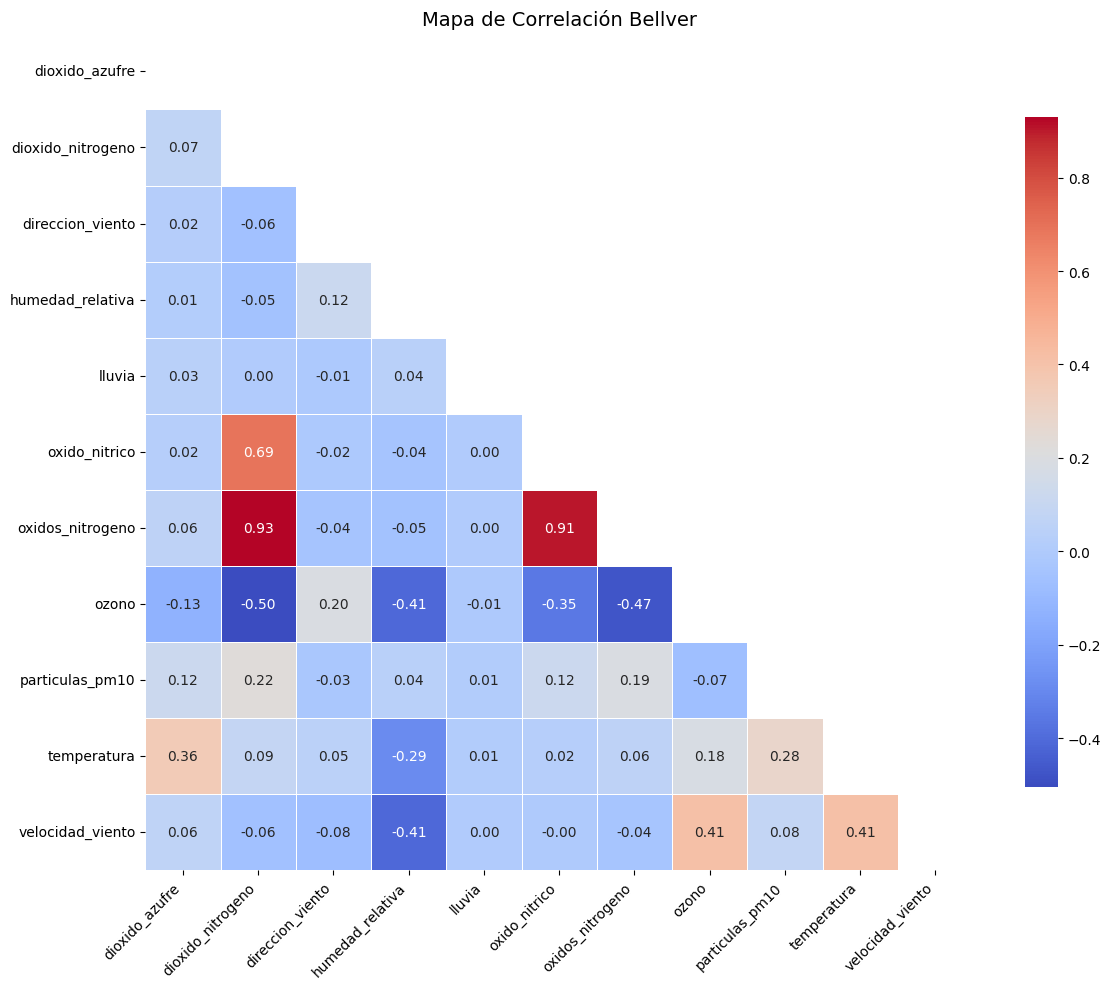

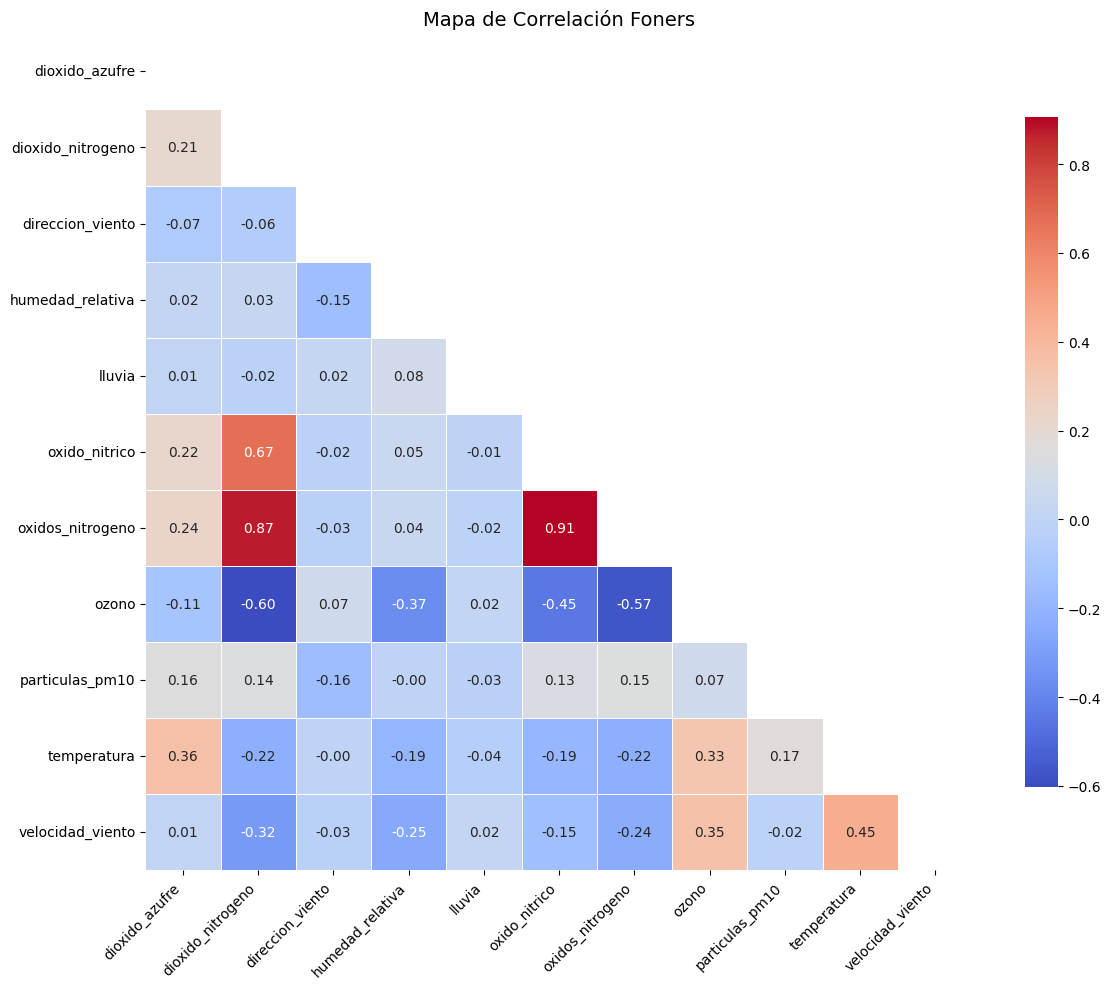

In [10]:


def plot_correlation_matrix(df, title):
    columns_to_drop = ['z_score', 'z_score mod']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    numeric_df = numeric_df.reindex(sorted(numeric_df.columns), axis=1)
    
    corr = numeric_df.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
    
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(df, 'Mapa de Correlación Bellver')

plot_correlation_matrix(df_foners, 'Mapa de Correlación Foners')

Para hacer un análisis de los outliers en el dataset generaremos unos gráficos de dispersión en los que veremos los datos que salen de un rango de percentiles. Vemos que los datos si tienen dispersión. 

En los gráficos en cambio que usan el df por días hay muchos menos outliers, aunque los datapoints son 365 así que para un modelo predictivo debería usarse un modelo sencillo que podría tener una precisión más baja. Al ser los datos tan pequeños es preferible lidiar con outliers que intentar modelar con 365 filas. 

Para la parte de análisis de datos se mantendrán estos outliers. 

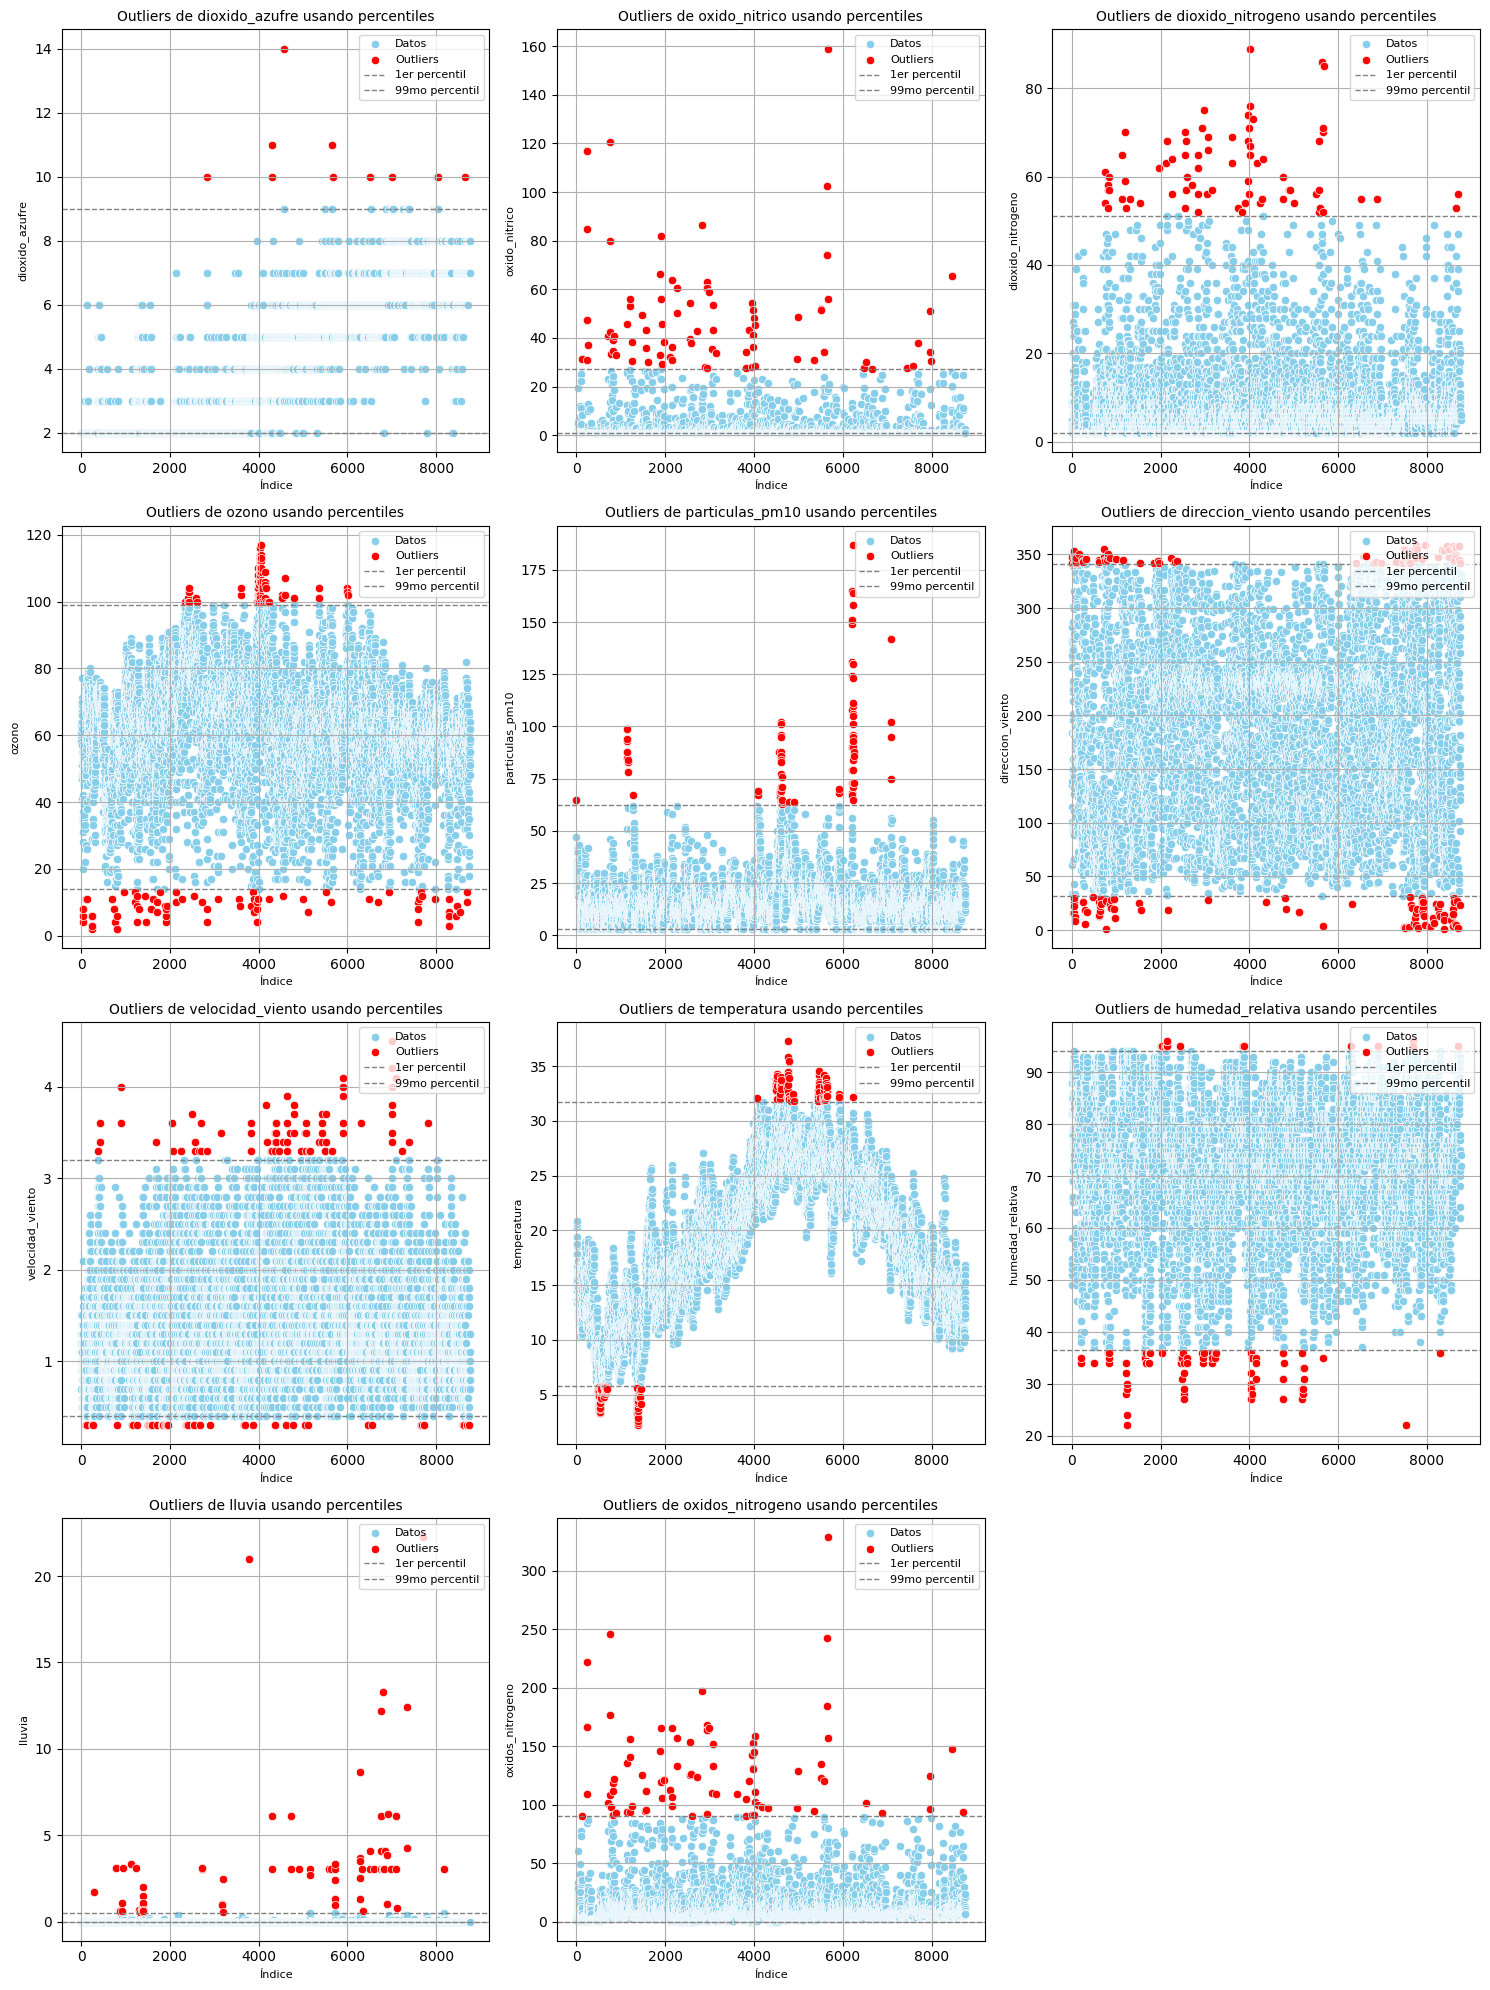

In [11]:

# Lista de variables para graficar
plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]

num_plots = len(plots)
fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, (num_plots // 3 + (num_plots % 3 > 0)) * 5))

axes = axes.flatten()

for i, plot in enumerate(plots):
    if plot in df.columns:
        lower_percentile = df[plot].quantile(0.01)
        upper_percentile = df[plot].quantile(0.99)
        
        outliers = (df[plot] < lower_percentile) | (df[plot] > upper_percentile)
        
        # Graficar los valores de la columna
        sns.scatterplot(data=df, x=df.index, y=plot, ax=axes[i], color='skyblue', label='Datos')
        
        # Resaltar outliers
        sns.scatterplot(data=df[outliers], x=df[outliers].index, y=plot, ax=axes[i], color='red', label='Outliers')
        
        axes[i].set_title(f'Outliers de {plot} usando percentiles', fontsize=10)
        axes[i].set_xlabel('Índice', fontsize=8)
        axes[i].set_ylabel(plot, fontsize=8)
        axes[i].axhline(y=lower_percentile, color='gray', linestyle='--', linewidth=1, label='1er percentil')  # Línea horizontal para el 1er percentil
        axes[i].axhline(y=upper_percentile, color='gray', linestyle='--', linewidth=1, label='99mo percentil')  # Línea horizontal para el 99mo percentil
        axes[i].grid(True)
        axes[i].legend(loc='upper right', fontsize=8)
    else:
        print(f"La columna {plot} no está presente en df")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

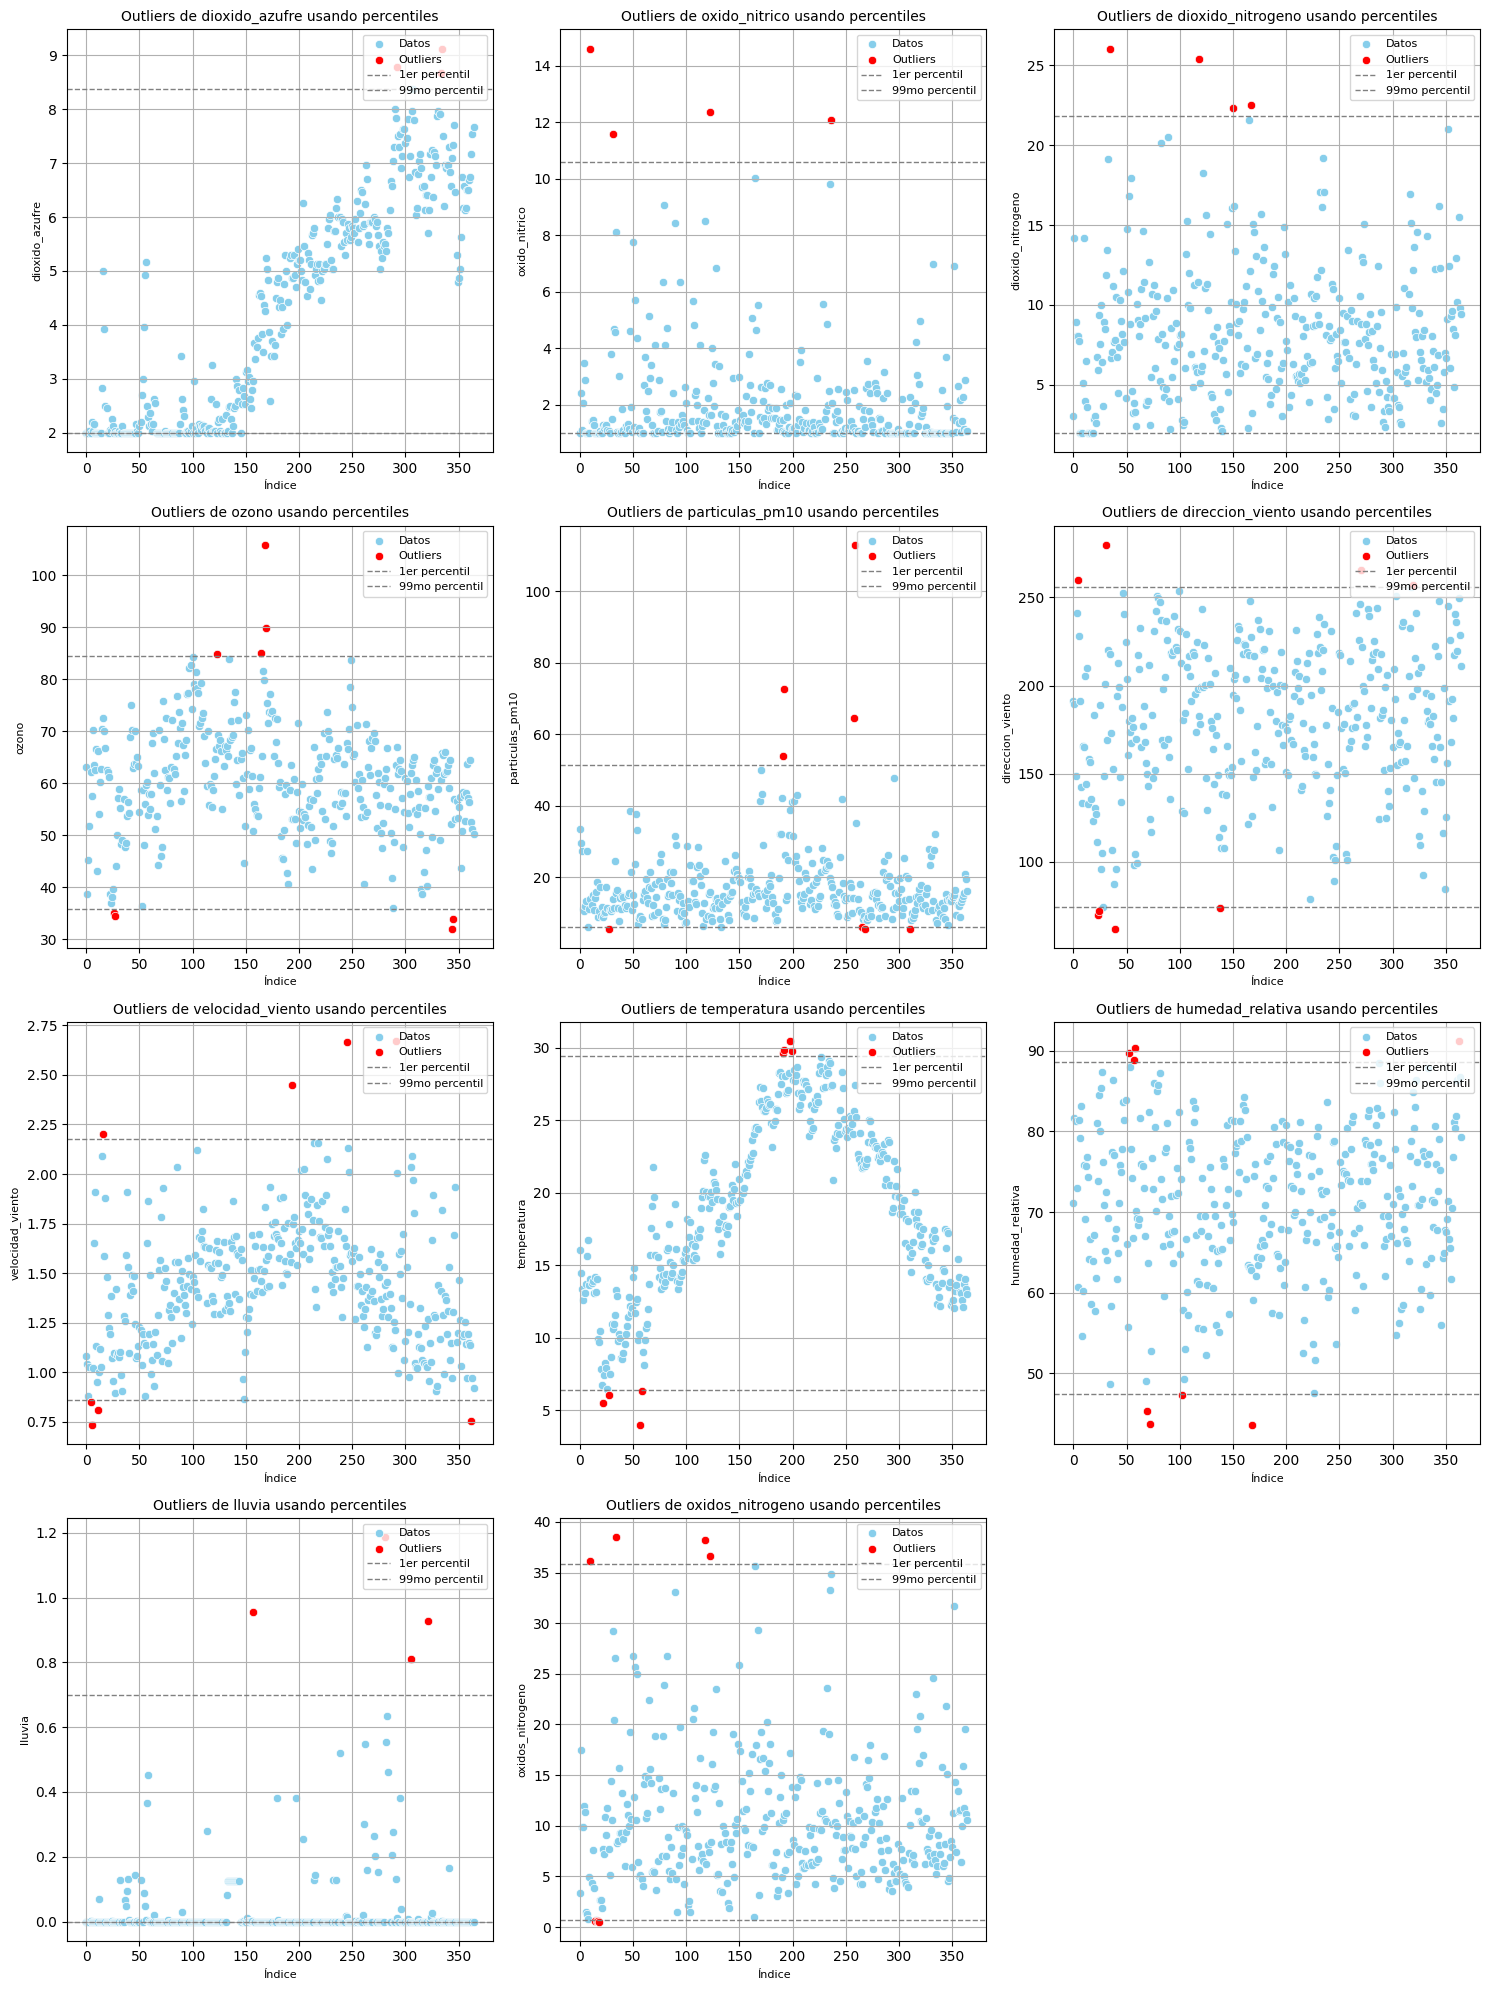

In [12]:

plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]

num_plots = len(plots)
fig, axes = plt.subplots(nrows=(num_plots // 3 ) + (num_plots % 3 > 0), ncols=3, figsize=(15, (num_plots // 3 + (num_plots % 3 > 0)) * 5))

axes = axes.flatten()

for i, plot in enumerate(plots):
    if plot in daily_mean_df.columns:
        # Calcular percentiles para la columna actual
        lower_percentile = daily_mean_df[plot].quantile(0.01)
        upper_percentile = daily_mean_df[plot].quantile(0.99)
        
        outliers = (daily_mean_df[plot] < lower_percentile) | (daily_mean_df[plot] > upper_percentile)
        
        sns.scatterplot(data=daily_mean_df, x=daily_mean_df.index, y=plot, ax=axes[i], color='skyblue', label='Datos')
        
        sns.scatterplot(data=daily_mean_df[outliers], x=daily_mean_df[outliers].index, y=plot, ax=axes[i], color='red', label='Outliers')
        
        # Configurar los ejes y títulos
        axes[i].set_title(f'Outliers de {plot} usando percentiles', fontsize=10)
        axes[i].set_xlabel('Índice', fontsize=8)
        axes[i].set_ylabel(plot, fontsize=8)
        axes[i].axhline(y=lower_percentile, color='gray', linestyle='--', linewidth=1, label='1er percentil')  # Línea horizontal para el 1er percentil
        axes[i].axhline(y=upper_percentile, color='gray', linestyle='--', linewidth=1, label='99mo percentil')  # Línea horizontal para el 99mo percentil
        axes[i].grid(True)
        axes[i].legend(loc='upper right', fontsize=8)
    else:
        print(f"La columna {plot} no está presente en df")

# Eliminar los subplots vacíos si el número de variables no es múltiplo de 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

Ahora repetimos el mismo análisis de outliers con el dataframe de Foners y su versión por días. Podemos ver como de igual manera en el dataframe por horas hay muchos más outliers debido a la varianza de los datos pero en cambio en la versión por días son muchísimos menos. 

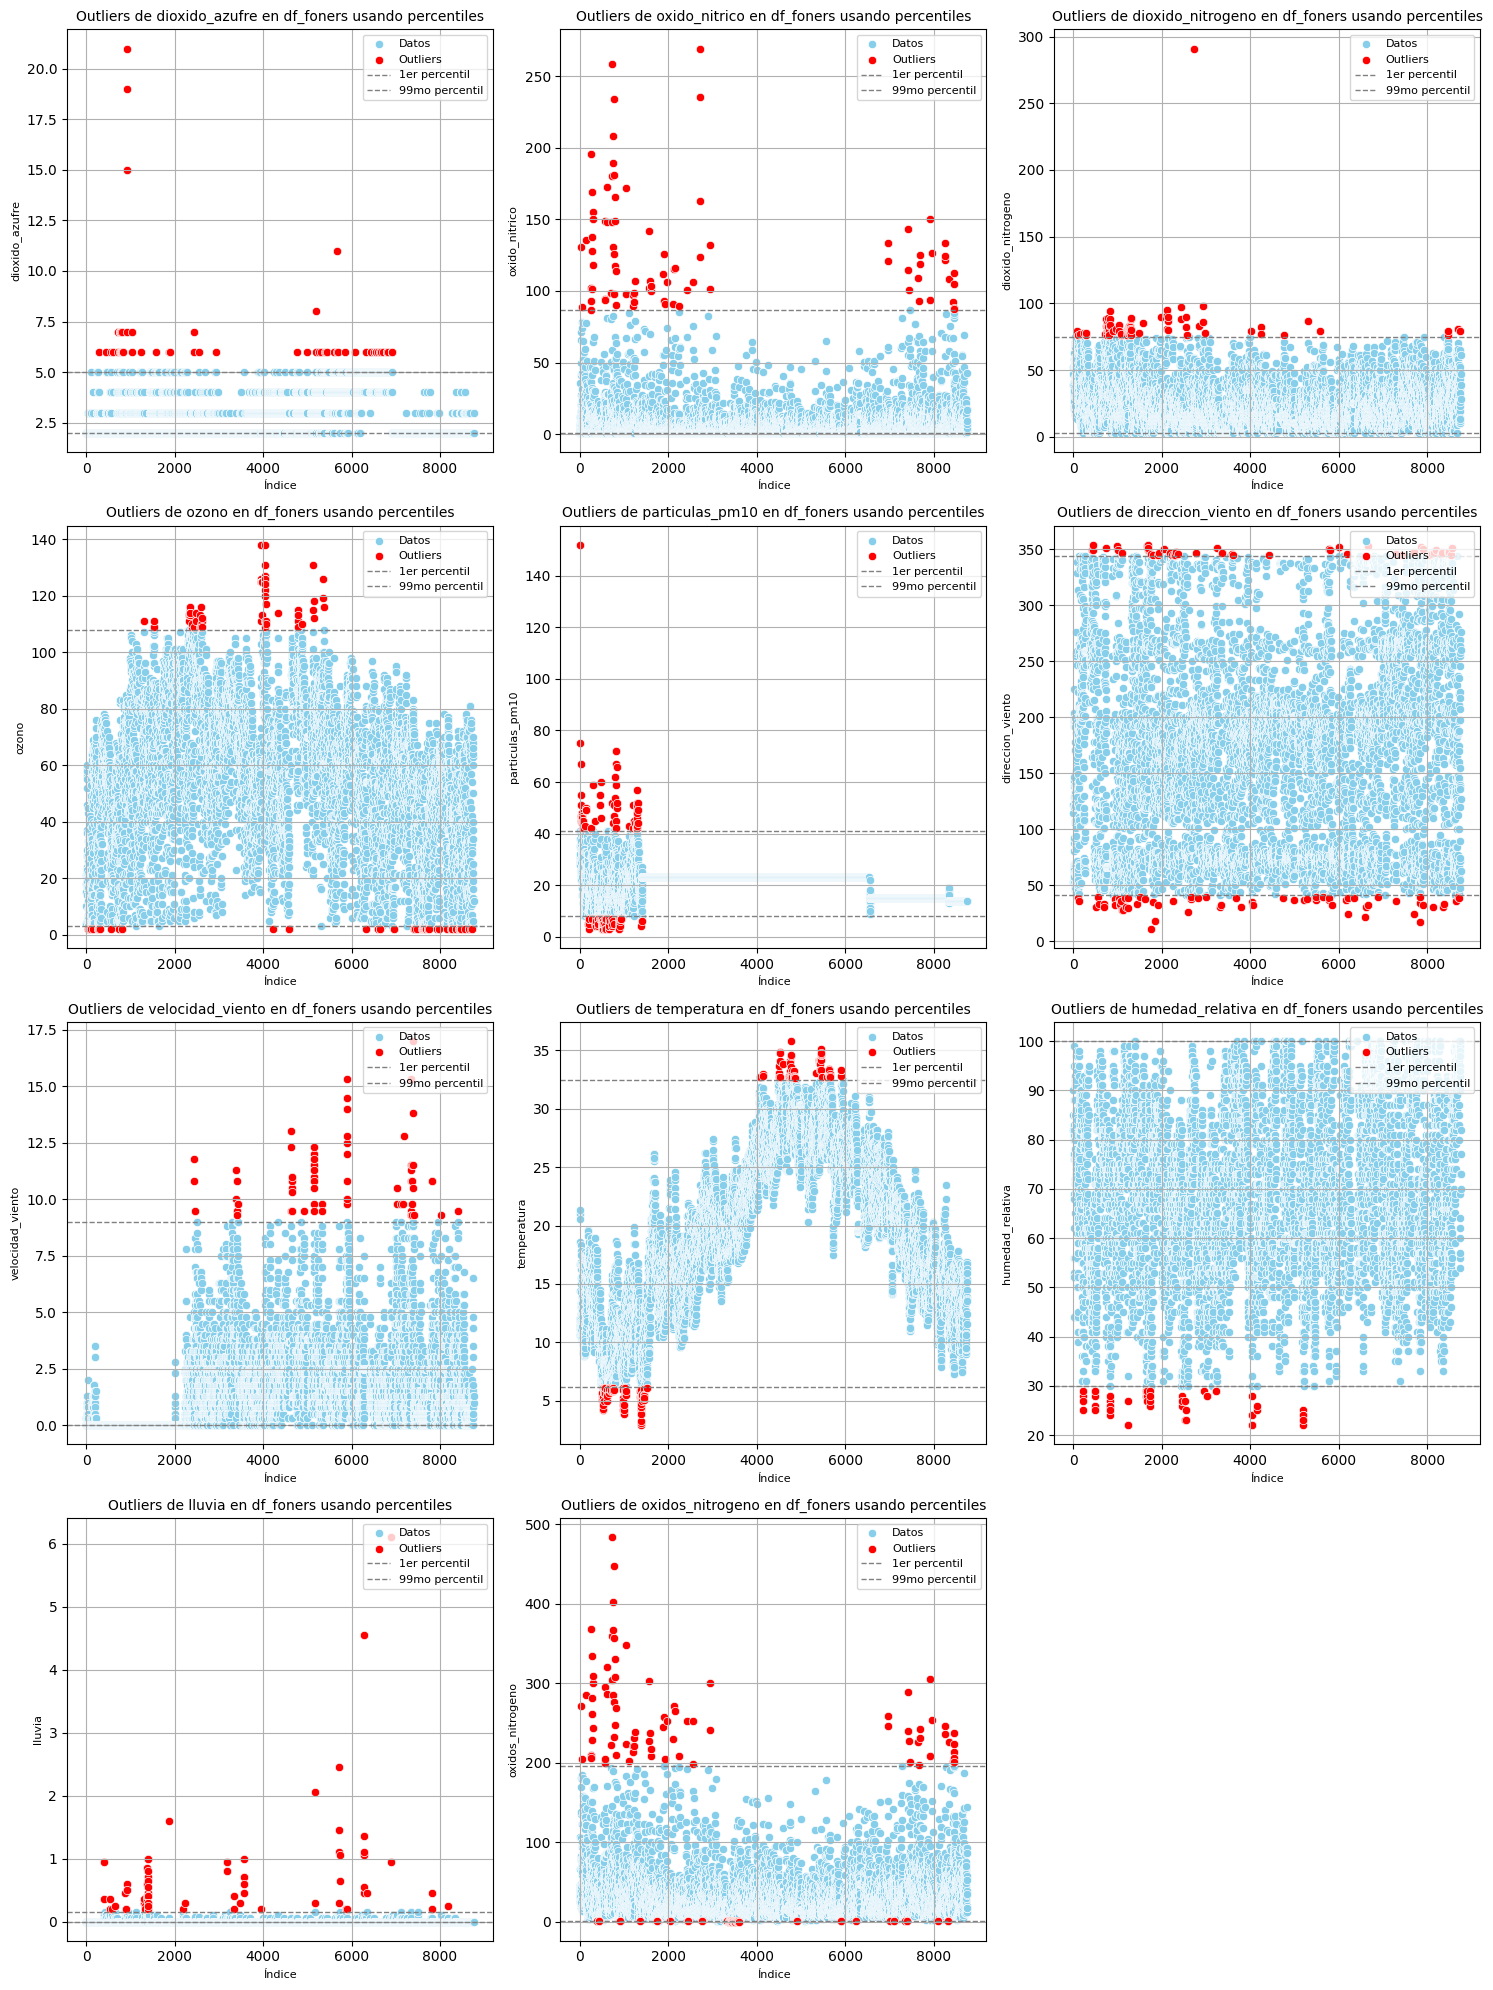

In [13]:
plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]

num_plots = len(plots)
fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, (num_plots // 3 + (num_plots % 3 > 0)) * 5))

axes = axes.flatten()

for i, plot in enumerate(plots):
    if plot in df_foners.columns:
        lower_percentile = df_foners[plot].quantile(0.01)
        upper_percentile = df_foners[plot].quantile(0.99)
        
        outliers = (df_foners[plot] < lower_percentile) | (df_foners[plot] > upper_percentile)
        
        sns.scatterplot(data=df_foners, x=df_foners.index, y=plot, ax=axes[i], color='skyblue', label='Datos')
        
        sns.scatterplot(data=df_foners[outliers], x=df_foners[outliers].index, y=plot, ax=axes[i], color='red', label='Outliers')
        
        axes[i].set_title(f'Outliers de {plot} en df_foners usando percentiles', fontsize=10)
        axes[i].set_xlabel('Índice', fontsize=8)
        axes[i].set_ylabel(plot, fontsize=8)
        axes[i].axhline(y=lower_percentile, color='gray', linestyle='--', linewidth=1, label='1er percentil')  # Línea horizontal para el 1er percentil
        axes[i].axhline(y=upper_percentile, color='gray', linestyle='--', linewidth=1, label='99mo percentil')  # Línea horizontal para el 99mo percentil
        axes[i].grid(True)
        axes[i].legend(loc='upper right', fontsize=8)
    else:
        print(f"La columna {plot} no está presente en df_foners")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


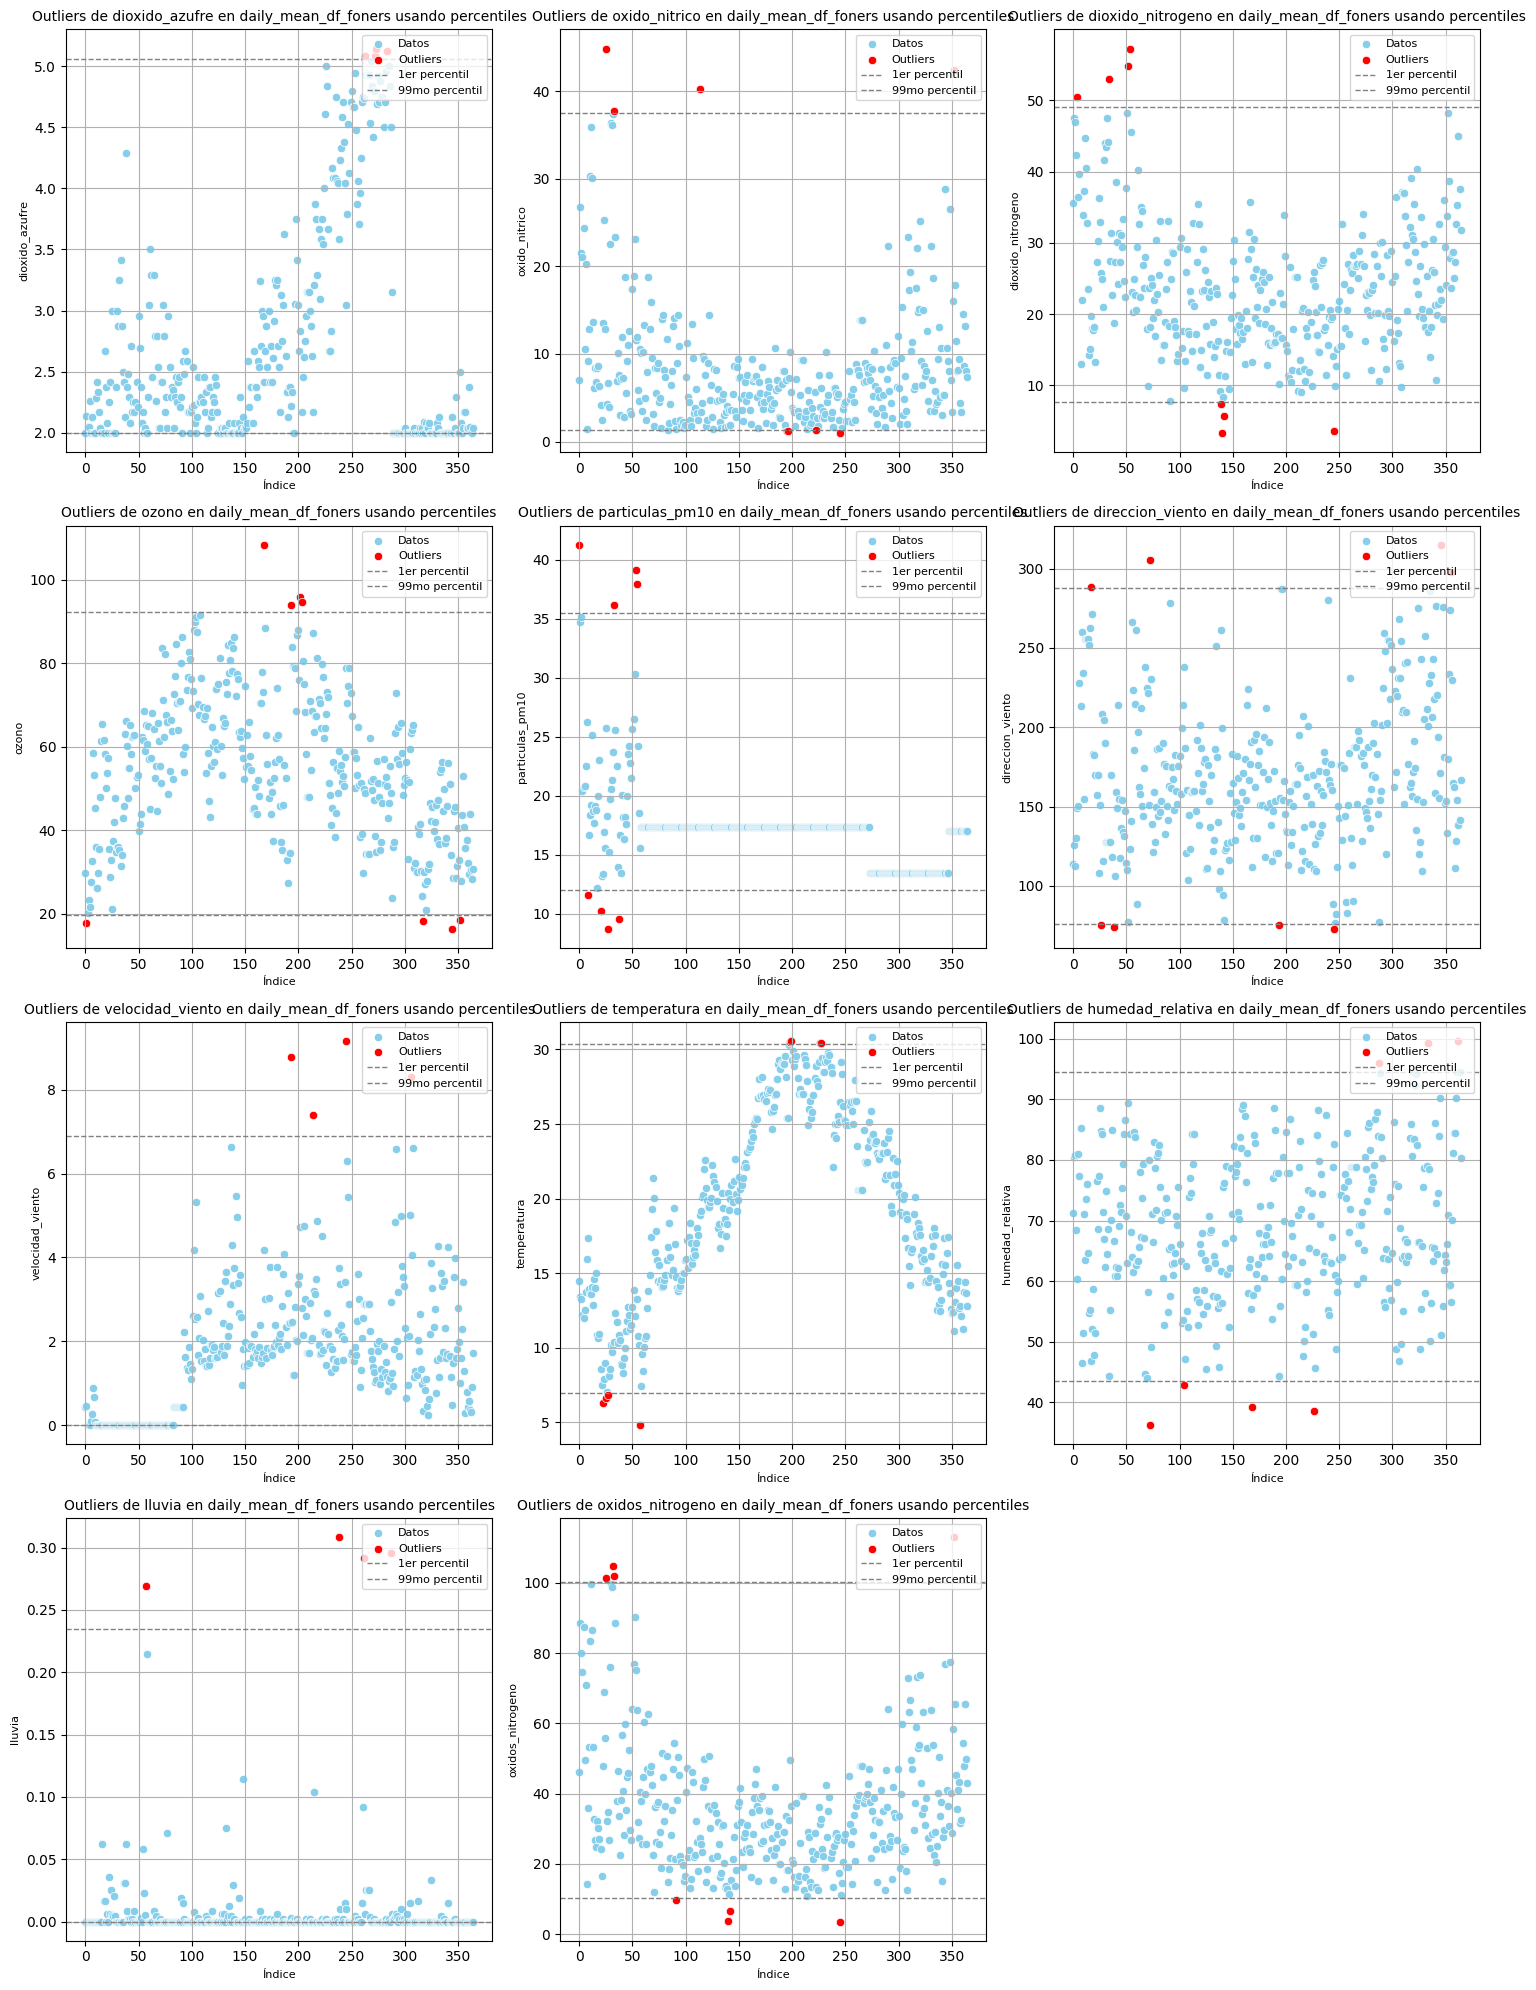

In [14]:
plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]
num_plots = len(plots)
fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, (num_plots // 3 + (num_plots % 3 > 0)) * 5))

axes = axes.flatten()

for i, plot in enumerate(plots):
    if plot in daily_mean_df_foners.columns:
        lower_percentile = daily_mean_df_foners[plot].quantile(0.01)
        upper_percentile = daily_mean_df_foners[plot].quantile(0.99)
        
        outliers = (daily_mean_df_foners[plot] < lower_percentile) | (daily_mean_df_foners[plot] > upper_percentile)
        
        sns.scatterplot(data=daily_mean_df_foners, x=daily_mean_df_foners.index, y=plot, ax=axes[i], color='skyblue', label='Datos')
        
        sns.scatterplot(data=daily_mean_df_foners[outliers], x=daily_mean_df_foners[outliers].index, y=plot, ax=axes[i], color='red', label='Outliers')
        
     
        axes[i].set_title(f'Outliers de {plot} en daily_mean_df_foners usando percentiles', fontsize=10)
        axes[i].set_xlabel('Índice', fontsize=8)
        axes[i].set_ylabel(plot, fontsize=8)
        axes[i].axhline(y=lower_percentile, color='gray', linestyle='--', linewidth=1, label='1er percentil')  # Línea horizontal para el 1er percentil
        axes[i].axhline(y=upper_percentile, color='gray', linestyle='--', linewidth=1, label='99mo percentil')  # Línea horizontal para el 99mo percentil
        axes[i].grid(True)
        axes[i].legend(loc='upper right', fontsize=8)
    else:
        print(f"La columna {plot} no está presente en daily_mean_df_foners")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

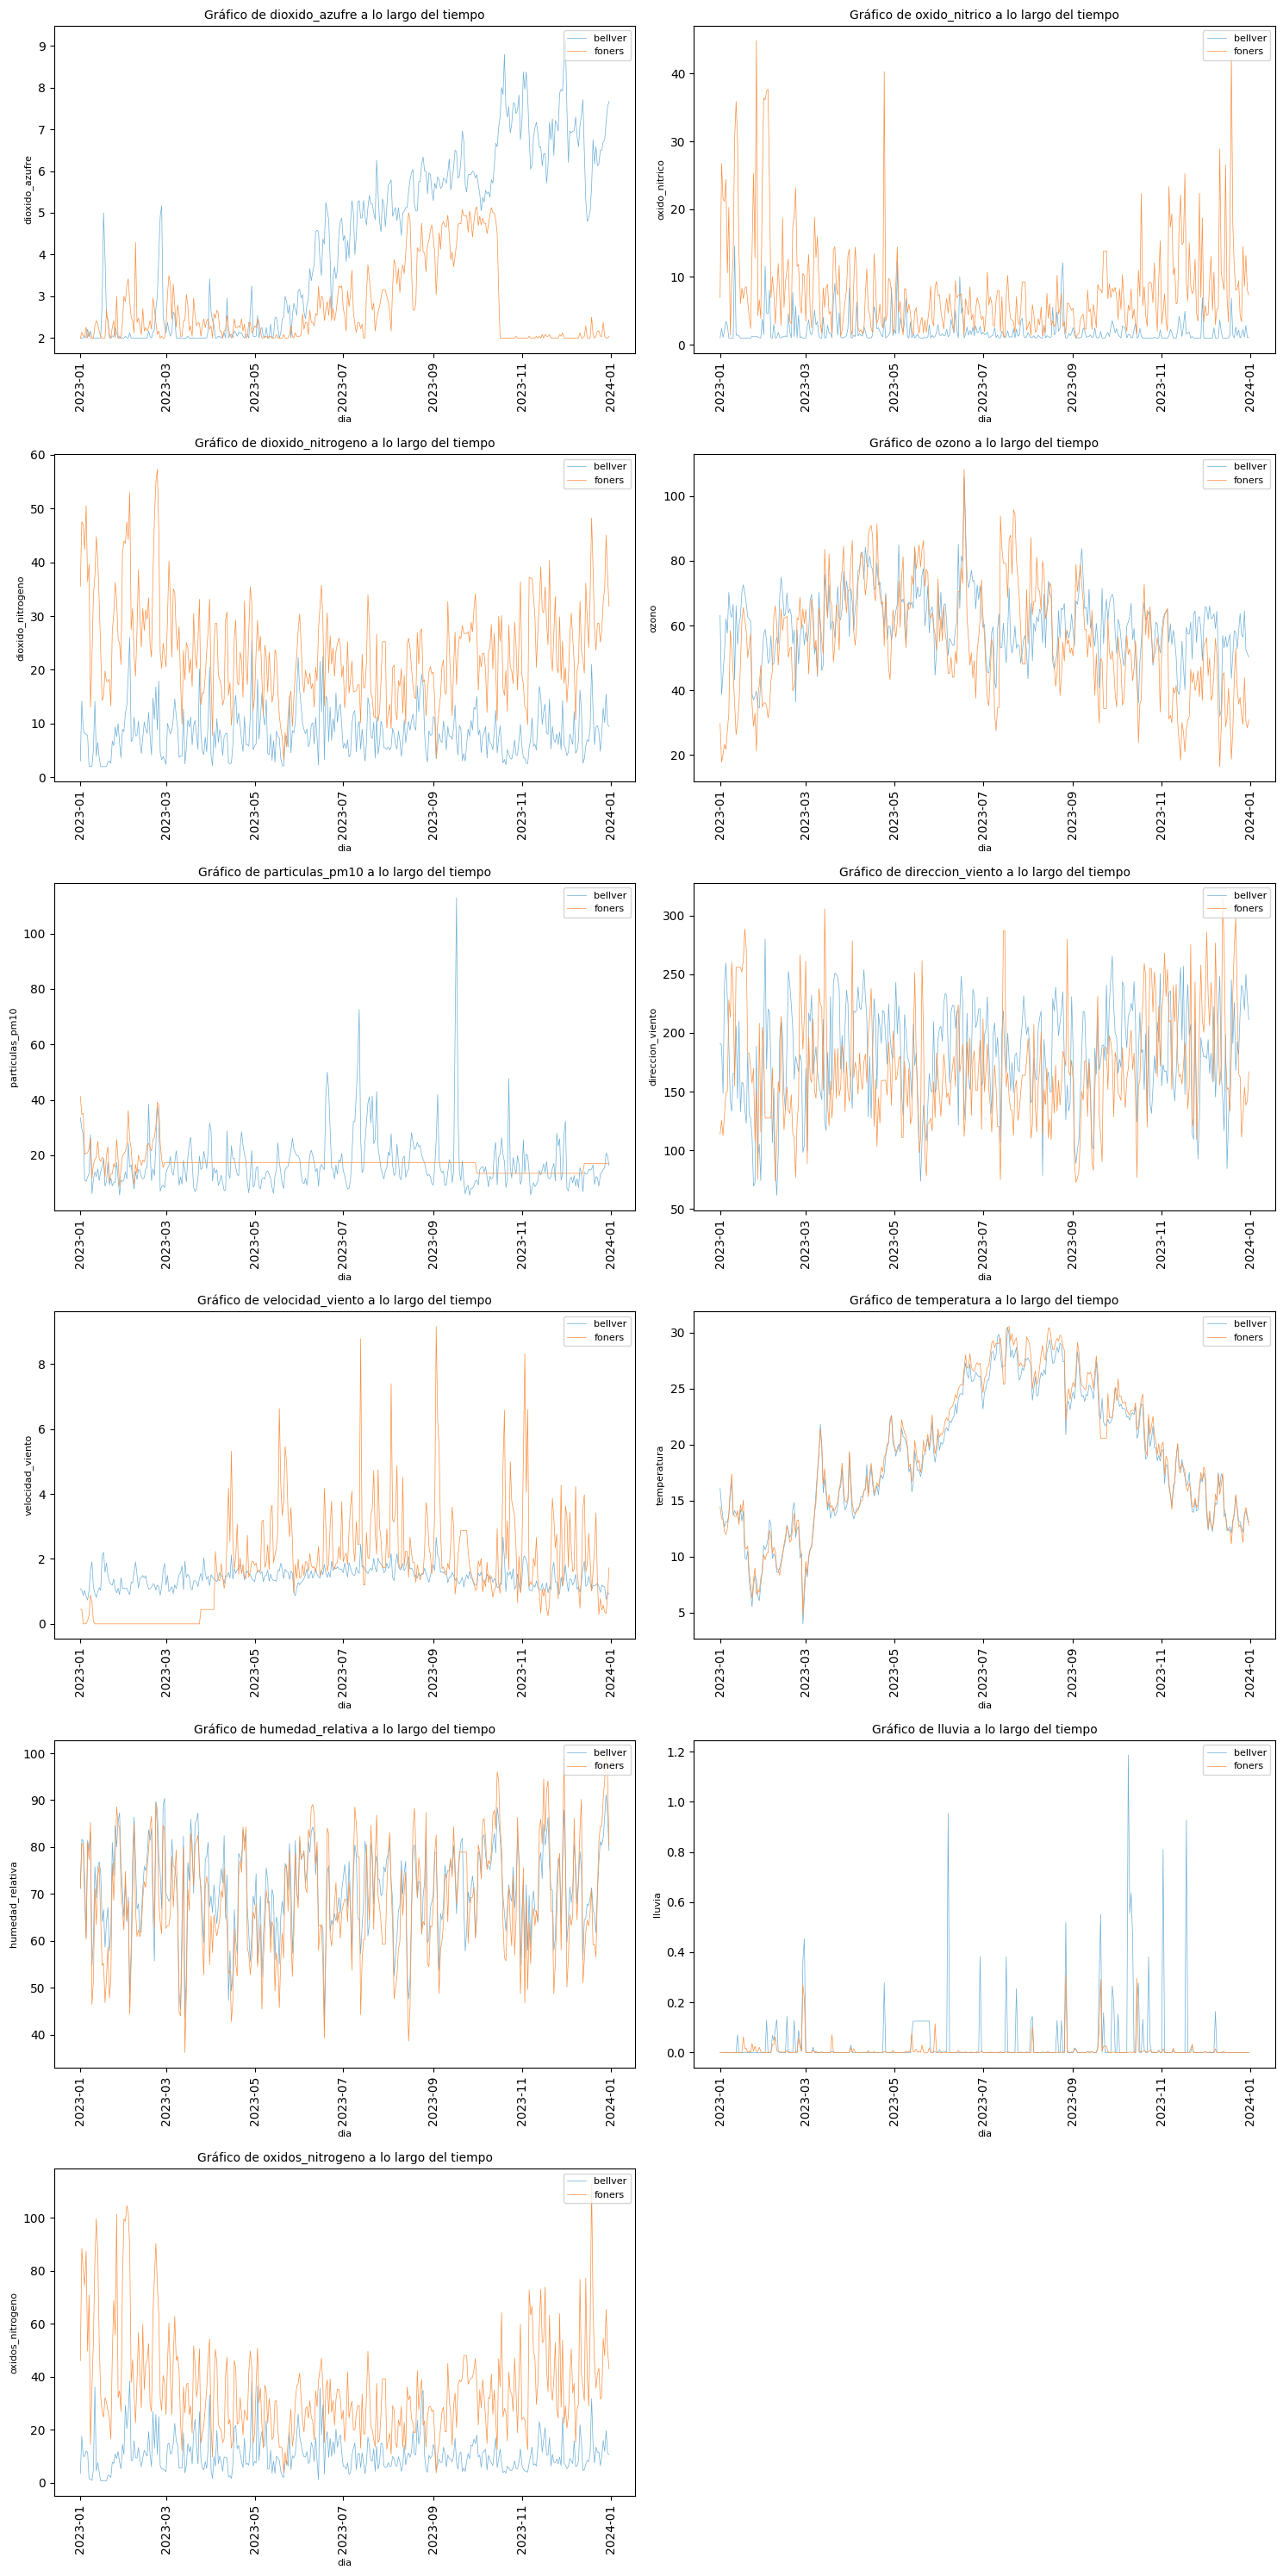

In [15]:
plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]


num_plots = len(plots)
fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2 > 0), ncols=2, figsize=(15, (num_plots // 2 + (num_plots % 2 > 0)) * 5))


axes = axes.flatten()


color_bellver = "#6baed6"  # Azul suave
color_foners = "#fd8d3c"   # Naranja suave


daily_mean_df['dia'] = pd.to_datetime(daily_mean_df['dia'])
daily_mean_df_foners['dia'] = pd.to_datetime(daily_mean_df_foners['dia'])

# Loop para generar los gráficos de línea y dispersión
for i, plot in enumerate(plots):
   
    sns.lineplot(data=daily_mean_df, x='dia', y=plot, ax=axes[i], linewidth=0.5, label='bellver', color=color_bellver)
    
    
    if plot in daily_mean_df_foners.columns:
        sns.lineplot(data=daily_mean_df_foners, x='dia', y=plot, ax=axes[i], linewidth=0.5, label='foners', color=color_foners)
    

    alert_col = f'{plot}_alert'
    if alert_col in daily_mean_df.columns:
        sns.scatterplot(data=daily_mean_df[daily_mean_df[alert_col] > 0], x='dia', y=alert_col, ax=axes[i], color='red', s=10, label='alerta bellver')
    
 
    if alert_col in daily_mean_df_foners.columns:
        sns.scatterplot(data=daily_mean_df_foners[daily_mean_df_foners[alert_col] > 0], x='dia', y=alert_col, ax=axes[i], color='red', s=10, marker='x', label='alerta foners')
    
    axes[i].set_title(f'Gráfico de {plot} a lo largo del tiempo', fontsize=10)
    axes[i].set_xlabel('dia', fontsize=8)
    axes[i].set_ylabel(plot, fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(False)
    axes[i].legend(loc='upper right', fontsize=8)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Análisis de los Gráficos 

## Contexto de las Estaciones:
1. **Bellver**:
   - Ubicada en la montaña, lejos de la ciudad pero cerca del puerto, con posible influencia del tráfico marítimo (cruceros).
   - Menor influencia de fuentes urbanas directas.

2. **Foners**:
   - En el centro de Palma, expuesta a fuentes urbanas como tráfico rodado, actividades comerciales y residenciales.
   - Más lejos del puerto.

## Observaciones por Contaminante:

### 1. **Dióxido de Azufre (SO₂)**:
   - **Bellver**: Probablemente muestra valores más altos debido al impacto del tráfico marítimo (cruceros).
   - **Foners**: Menores concentraciones si la influencia portuaria es limitada.

### 2. **Óxidos de Nitrógeno (NO, NO₂, NOx)**:
   - **Foners**: Niveles más altos por el tráfico urbano intenso.
   - **Bellver**: Moderados, posiblemente influenciados por emisiones del puerto transportadas por el viento.

### 3. **Ozono (O₃)**:
   - **Bellver**: Es probable que registre niveles más altos debido a la menor influencia de óxidos de nitrógeno, que tienden a consumir ozono en áreas urbanas.
   - **Foners**: Niveles más bajos debido a la presencia de fuentes urbanas directas.

### 4. **Partículas PM10**:
   - **Foners**: Niveles más altos por tráfico y actividades urbanas.
   - **Bellver**: Posiblemente menor concentración, pero con impacto del polvo o partículas del puerto.

## Factores Meteorológicos:
1. **Viento**:
   - Las diferencias en la dirección y velocidad del viento podrían explicar la dispersión de contaminantes desde el puerto hacia Bellver o desde la ciudad hacia Foners.
   
2. **Lluvia**:
   - Puede reducir temporalmente las concentraciones de partículas y otros contaminantes.

3. **Temperatura y Humedad**:
   - Estas variables podrían influir en la formación y dispersión de ozono y partículas en ambas estaciones.



In [16]:
df['fecha'] = pd.to_datetime(df['fecha'])

df['mes'] = df['fecha'].dt.to_period('M')

grouped_month_df = df.groupby('mes').sum(numeric_only=True).reset_index()

grouped_month_df['mes'] = grouped_month_df['mes'].astype(str)

df_foners['fecha'] = pd.to_datetime(df_foners['fecha'])

df_foners['mes'] = df_foners['fecha'].dt.to_period('M')

grouped_month_df_foners = df_foners.groupby('mes').sum(numeric_only=True).reset_index()

grouped_month_df_foners['mes'] = grouped_month_df_foners['mes'].astype(str)




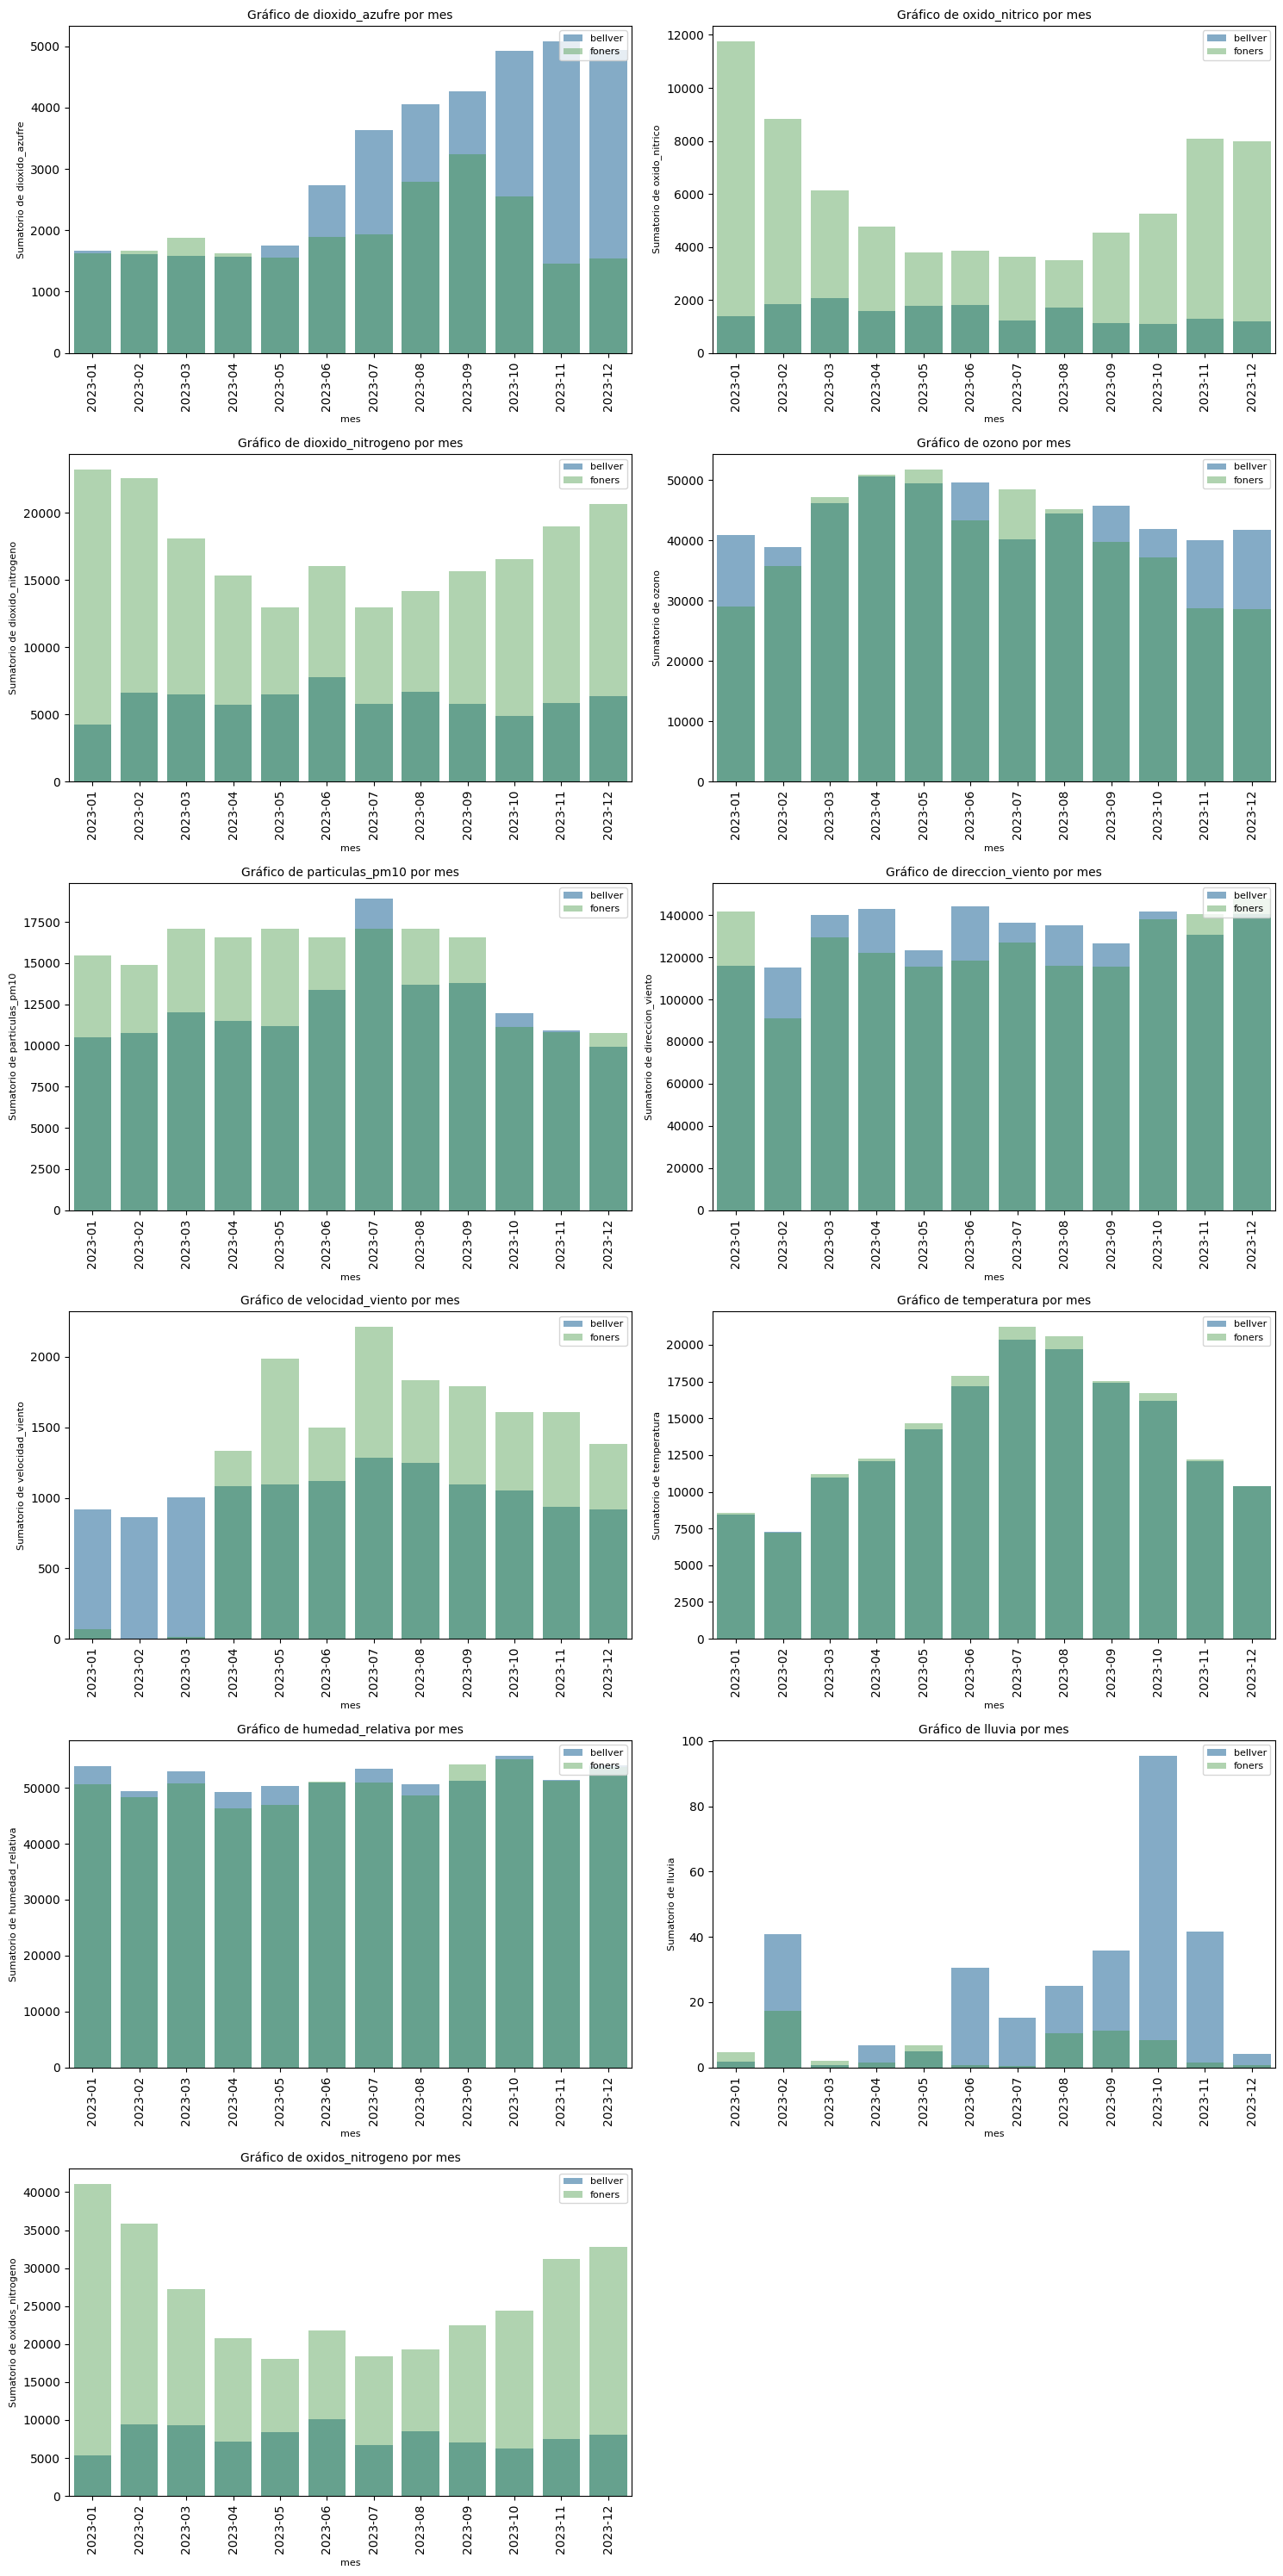

In [17]:

plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]


num_plots = len(plots)
fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2 > 0), ncols=2, figsize=(15, (num_plots // 2 + (num_plots % 2 > 0)) * 5))

axes = axes.flatten()

color_bellver = "#1f77b4"  
color_foners = "#2ca02c"   

for i, plot in enumerate(plots):
    if plot in grouped_month_df.columns and plot in grouped_month_df_foners.columns:
        
        sns.barplot(data=grouped_month_df, x='mes', y=plot, ax=axes[i], color=color_bellver, label='bellver', alpha=0.6)
        
    
        sns.barplot(data=grouped_month_df_foners, x='mes', y=plot, ax=axes[i], color=color_foners, label='foners', alpha=0.4)
        
        axes[i].set_title(f'Gráfico de {plot} por mes', fontsize=10)
        axes[i].set_xlabel('mes', fontsize=8)
        axes[i].set_ylabel(f'Sumatorio de {plot}', fontsize=8)
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].grid(False)
        axes[i].legend(loc='upper right', fontsize=8)
    else:
        print(f"La columna {plot} no está presente en ambos DataFrames")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

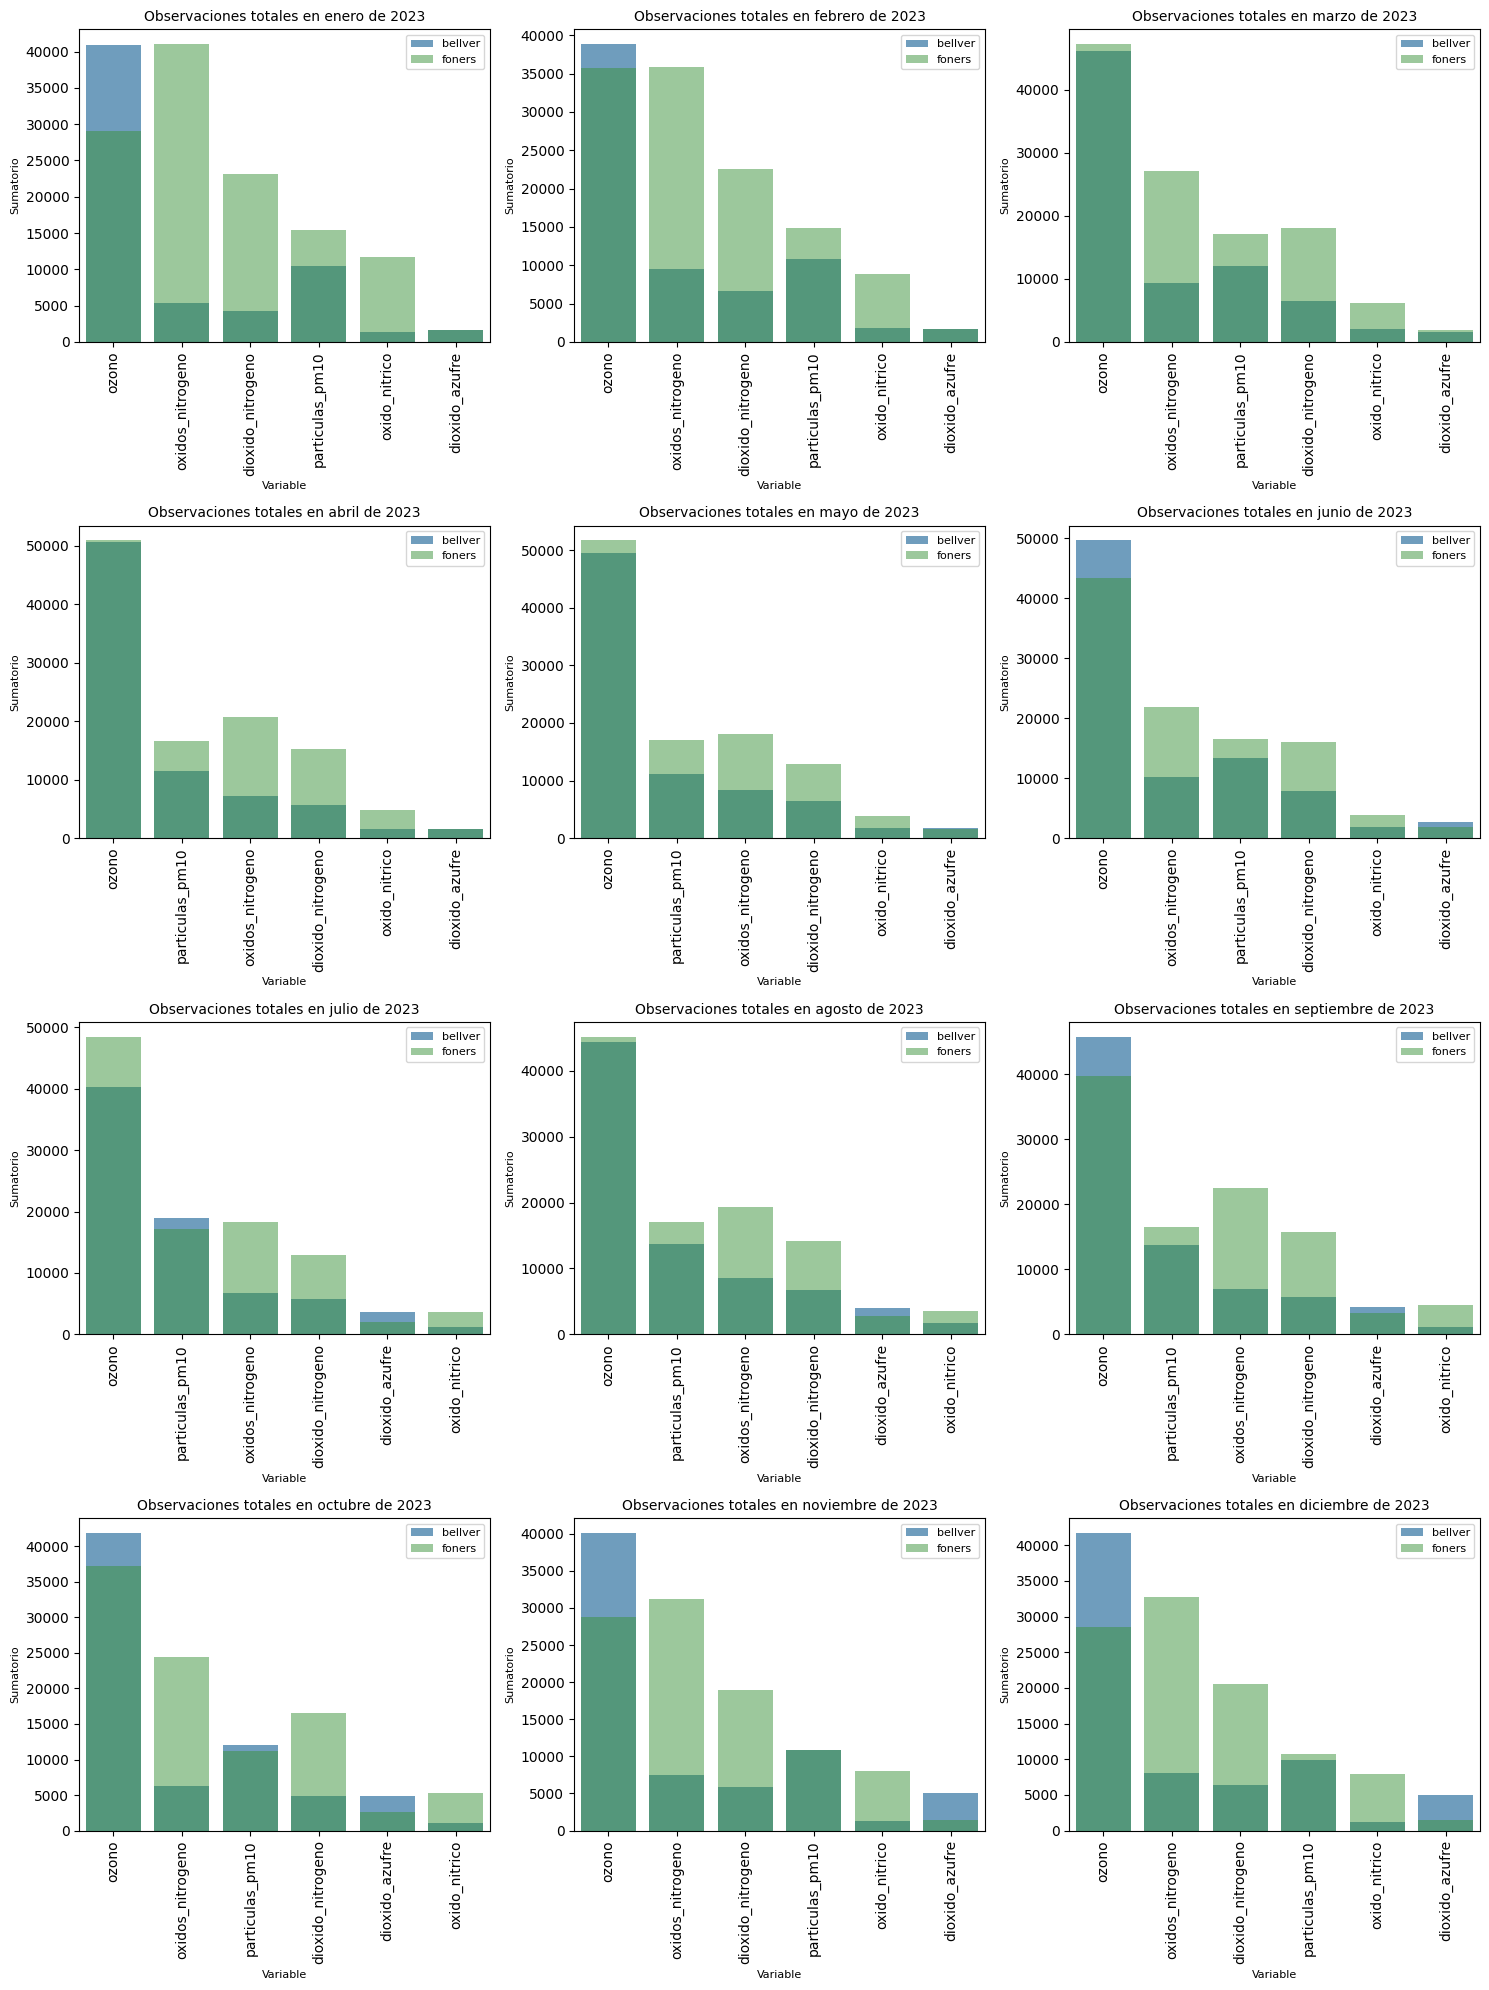

In [18]:


# Definir colores
color_bellver = "#1f77b4"  # Azul más oscuro y neutro
color_foners = "#2ca02c"   # Verde más oscuro

# Convertir FECHA_HI a datetime y crear la columna MES_HI para ambos DataFrames
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.to_period('M')

df_foners['fecha'] = pd.to_datetime(df_foners['fecha'])
df_foners['mes'] = df_foners['fecha'].dt.to_period('M')

# Agrupar los datos por 'MES_HI' y calcular la suma de las columnas numéricas
monthly_sum_df = df.groupby('mes').sum(numeric_only=True).reset_index()
monthly_sum_df['mes'] = monthly_sum_df['mes'].astype(str)

monthly_sum_df_foners = df_foners.groupby('mes').sum(numeric_only=True).reset_index()
monthly_sum_df_foners['mes'] = monthly_sum_df_foners['mes'].astype(str)

# Eliminar las variables 'direccion_viento', 'humedad_relativa', 'velocidad_viento' y 'lluvia' de los DataFrames
columns_to_drop = ['direccion_viento', 'humedad_relativa', 'velocidad_viento', 'lluvia', 'temperatura']
monthly_sum_df = monthly_sum_df.drop(columns=columns_to_drop, errors='ignore')
monthly_sum_df_foners = monthly_sum_df_foners.drop(columns=columns_to_drop, errors='ignore')

# Pivotar los DataFrames para graficar
pivot_df = monthly_sum_df.melt(id_vars='mes', var_name='Variable', value_name='Value')
pivot_df_foners = monthly_sum_df_foners.melt(id_vars='mes', var_name='Variable', value_name='Value')

# Obtener meses únicos para graficar
months = pivot_df['mes'].unique()
num_months = len(months)

# Configurar tamaño de la figura y número de subplots por fila
fig, axes = plt.subplots(nrows=(num_months // 3) + (num_months % 3 > 0), ncols=3, figsize=(15, (num_months // 3 + (num_months % 3 > 0)) * 5))

axes = axes.flatten()

# Diccionario para convertir números de mes a nombres
months_dict = {
    '01': 'enero', '02': 'febrero', '03': 'marzo', '04': 'abril',
    '05': 'mayo', '06': 'junio', '07': 'julio', '08': 'agosto',
    '09': 'septiembre', '10': 'octubre', '11': 'noviembre', '12': 'diciembre'
}

# Loop para generar los gráficos de barras
for i, month in enumerate(months):
    # Filtrar datos por mes
    month_data = pivot_df[pivot_df['mes'] == month]
    month_data_foners = pivot_df_foners[pivot_df_foners['mes'] == month]
    
    # Ordenar las variables de mayor a menor por el valor combinado de Bellver y Foners
    combined_data = pd.concat([month_data, month_data_foners]).groupby('Variable')['Value'].sum().sort_values(ascending=False).index
    sorted_vars = list(combined_data)
    
    # Graficar barras para monthly_sum_df en azul
    sns.barplot(data=month_data, x='Variable', y='Value', ax=axes[i], color=color_bellver, label='bellver', alpha=0.7, order=sorted_vars)
    
    # Graficar barras para monthly_sum_df_foners en verde
    sns.barplot(data=month_data_foners, x='Variable', y='Value', ax=axes[i], color=color_foners, label='foners', alpha=0.5, order=sorted_vars)
    
    # Convertir el mes y el año para el título
    year, month_num = month.split('-')
    month_name = months_dict[month_num]
    
    # Configurar los ejes y títulos
    axes[i].set_title(f'Observaciones totales en {month_name} de {year}', fontsize=10)
    axes[i].set_xlabel('Variable', fontsize=8)
    axes[i].set_ylabel('Sumatorio', fontsize=8)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(False)
    axes[i].legend(loc='upper right', fontsize=8)

# Eliminar los subplots vacíos si el número de variables no es múltiplo de 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()


# Análisis  de la Distribución de Contaminantes por Mes en 2023 

## Observaciones Generales:
Los gráficos muestran la distribución mensual de contaminantes en las estaciones de **Bellver** y **Foners**. Estos datos permiten identificar patrones y contrastar los niveles de contaminación entre ambas ubicaciones.

---

## Análisis por Contaminante:

### 1. **Ozono (O₃)**:
   - **Patrón General**:
     - El ozono es el contaminante dominante en ambas estaciones durante todo el año.
     - Los niveles son más altos en **Bellver**, consistente con su ubicación más alejada de fuentes urbanas, lo que favorece la formación de ozono debido a la menor presencia de óxidos de nitrógeno.
   - **Estacionalidad**:
     - Los niveles máximos se registran en verano (julio-agosto), coincidiendo con temperaturas más altas que favorecen las reacciones fotoquímicas.

### 2. **Partículas PM10**:
   - **Patrón General**:
     - En **Foners**, los niveles de partículas son significativamente más altos, lo que refleja la influencia del tráfico y actividades urbanas.
     - En **Bellver**, las partículas están en niveles más bajos, aunque presentan incrementos en algunos meses.
   - **Estacionalidad**:
     - Los meses de primavera (abril-mayo) y otoño (septiembre-octubre) muestran niveles más altos, posiblemente relacionados con cambios en la actividad portuaria o condiciones meteorológicas.

### 3. **Óxidos de Nitrógeno (NOx, NO₂)**:
   - **Patrón General**:
     - **Foners** tiene niveles consistentemente más altos, lo que indica su exposición al tráfico rodado y otras fuentes urbanas.
     - En **Bellver**, los valores son más bajos pero con picos intermitentes, posiblemente relacionados con el transporte de emisiones desde el puerto.
   - **Estacionalidad**:
     - Los niveles más altos se observan en meses de invierno (enero, diciembre), cuando las condiciones meteorológicas (menos dispersión por viento) favorecen la acumulación de contaminantes.

### 4. **Dióxido de Azufre (SO₂)**:
   - **Patrón General**:
     - El SO₂ es más relevante en **Bellver**, debido a la influencia del puerto y las emisiones de los cruceros.
     - En **Foners**, los niveles son casi insignificantes, reflejando la falta de fuentes portuarias directas.
   - **Estacionalidad**:
     - Los picos más altos se observan en meses de otoño e invierno (octubre-diciembre), coincidiendo con mayor actividad portuaria o menor dispersión.

---

## Conclusiones Combinadas:
1. **Impacto Urbano vs. Portuario**:
   - **Foners** está más afectada por actividades urbanas (tráfico, construcción, etc.), mientras que **Bellver** refleja la influencia del puerto y corrientes de aire que transportan contaminantes.

2. **Estacionalidad**:
   - El ozono aumenta significativamente en verano en ambas estaciones, pero los contaminantes como el NO₂ y las PM10 muestran aumentos en invierno, cuando las condiciones de dispersión son menos favorables.




In [19]:
df.to_csv('bellver2023.csv', index=False)

print("El DataFrame se ha exportado exitosamente a 'bellver2023.csv'.")

El DataFrame se ha exportado exitosamente a 'bellver2023.csv'.


Ahora que ya conocemos los datasets podemos empezar a trabajar con otros años. Vamos a crear una función que sirva para hacer la carga de los datasets de otros años y se encargue del preprocesado directamente para poder trabajar con ellos. 

In [20]:
def load_and_process_data(file_path, rename_dict):

    df = pd.read_excel(file_path)
    
    cols_to_drop = []
    for column in df.columns:
 
        if df[column].astype(str).str.contains('V|N', regex=True).any():
            cols_to_drop.append(column)
    
    df.drop(columns=cols_to_drop, inplace=True)

    columns_to_keep = [col for col in rename_dict.keys() if col in df.columns]
    
    df = df[columns_to_keep]

    df.rename(columns=rename_dict, inplace=True)
    
    df = df.ffill()

    return df

rename_dict = {
    'FECHA_HI': 'fecha',
    'PERIODO_HI': 'hora',
    'SO2_HI': 'dioxido_azufre',
    'FL_SO2': 'flujo_dioxido_azufre',
    'NO_HI': 'oxido_nitrico',
    'FL_NO': 'flujo_oxido_nitrico',
    'NO2_HI': 'dioxido_nitrogeno',
    'FL_NO2': 'flujo_dioxido_nitrogeno',
    'O3_HI': 'ozono',
    'FL_O3': 'flujo_ozono',
    'PM10_HI': 'particulas_pm10',
    'FL_PM10': 'flujo_particulas_pm10',
    'DD_HI': 'direccion_viento',
    'FL_DD': 'flujo_direccion_viento',
    'VV_HI': 'velocidad_viento',
    'FL_VV': 'flujo_velocidad_viento',
    'TMP_HI': 'temperatura',
    'FL_TMP': 'flujo_temperatura',
    'HR_HI': 'humedad_relativa',
    'FL_HR': 'flujo_humedad_relativa',
    'LL_HI': 'lluvia',
    'FL_LL': 'flujo_lluvia',
    'NOX_HI': 'oxidos_nitrogeno',
    'FL_NOX': 'flujo_oxidos_nitrogeno'
}

df_2022 = load_and_process_data('bellver2022.xls', rename_dict)
df_foners_2022 = load_and_process_data('foners2022raw.xls', rename_dict)
df_2021 = load_and_process_data('bellver2021raw.xls', rename_dict)
df_foners_2021 = load_and_process_data('foners2021raw.xls', rename_dict)
df_2020 = load_and_process_data('bellver2020raw.xls', rename_dict)
df_foners_2020 = load_and_process_data('foners2020raw.xls', rename_dict)
bellver2024real = load_and_process_data('bellver2024real.xls', rename_dict)

print("Bellver 2022:")
df_2022.head()

df_2022.to_csv('df_2022py.csv', index=False)


Bellver 2022:


Ahora que tenemos los datasets, hemos creado versiones mensuales para observar cómo varía el valor del sumatorio de cada variable. Esto nos permitirá detectar patrones entre años o comprobar si se trata de fluctuaciones aleatorias.

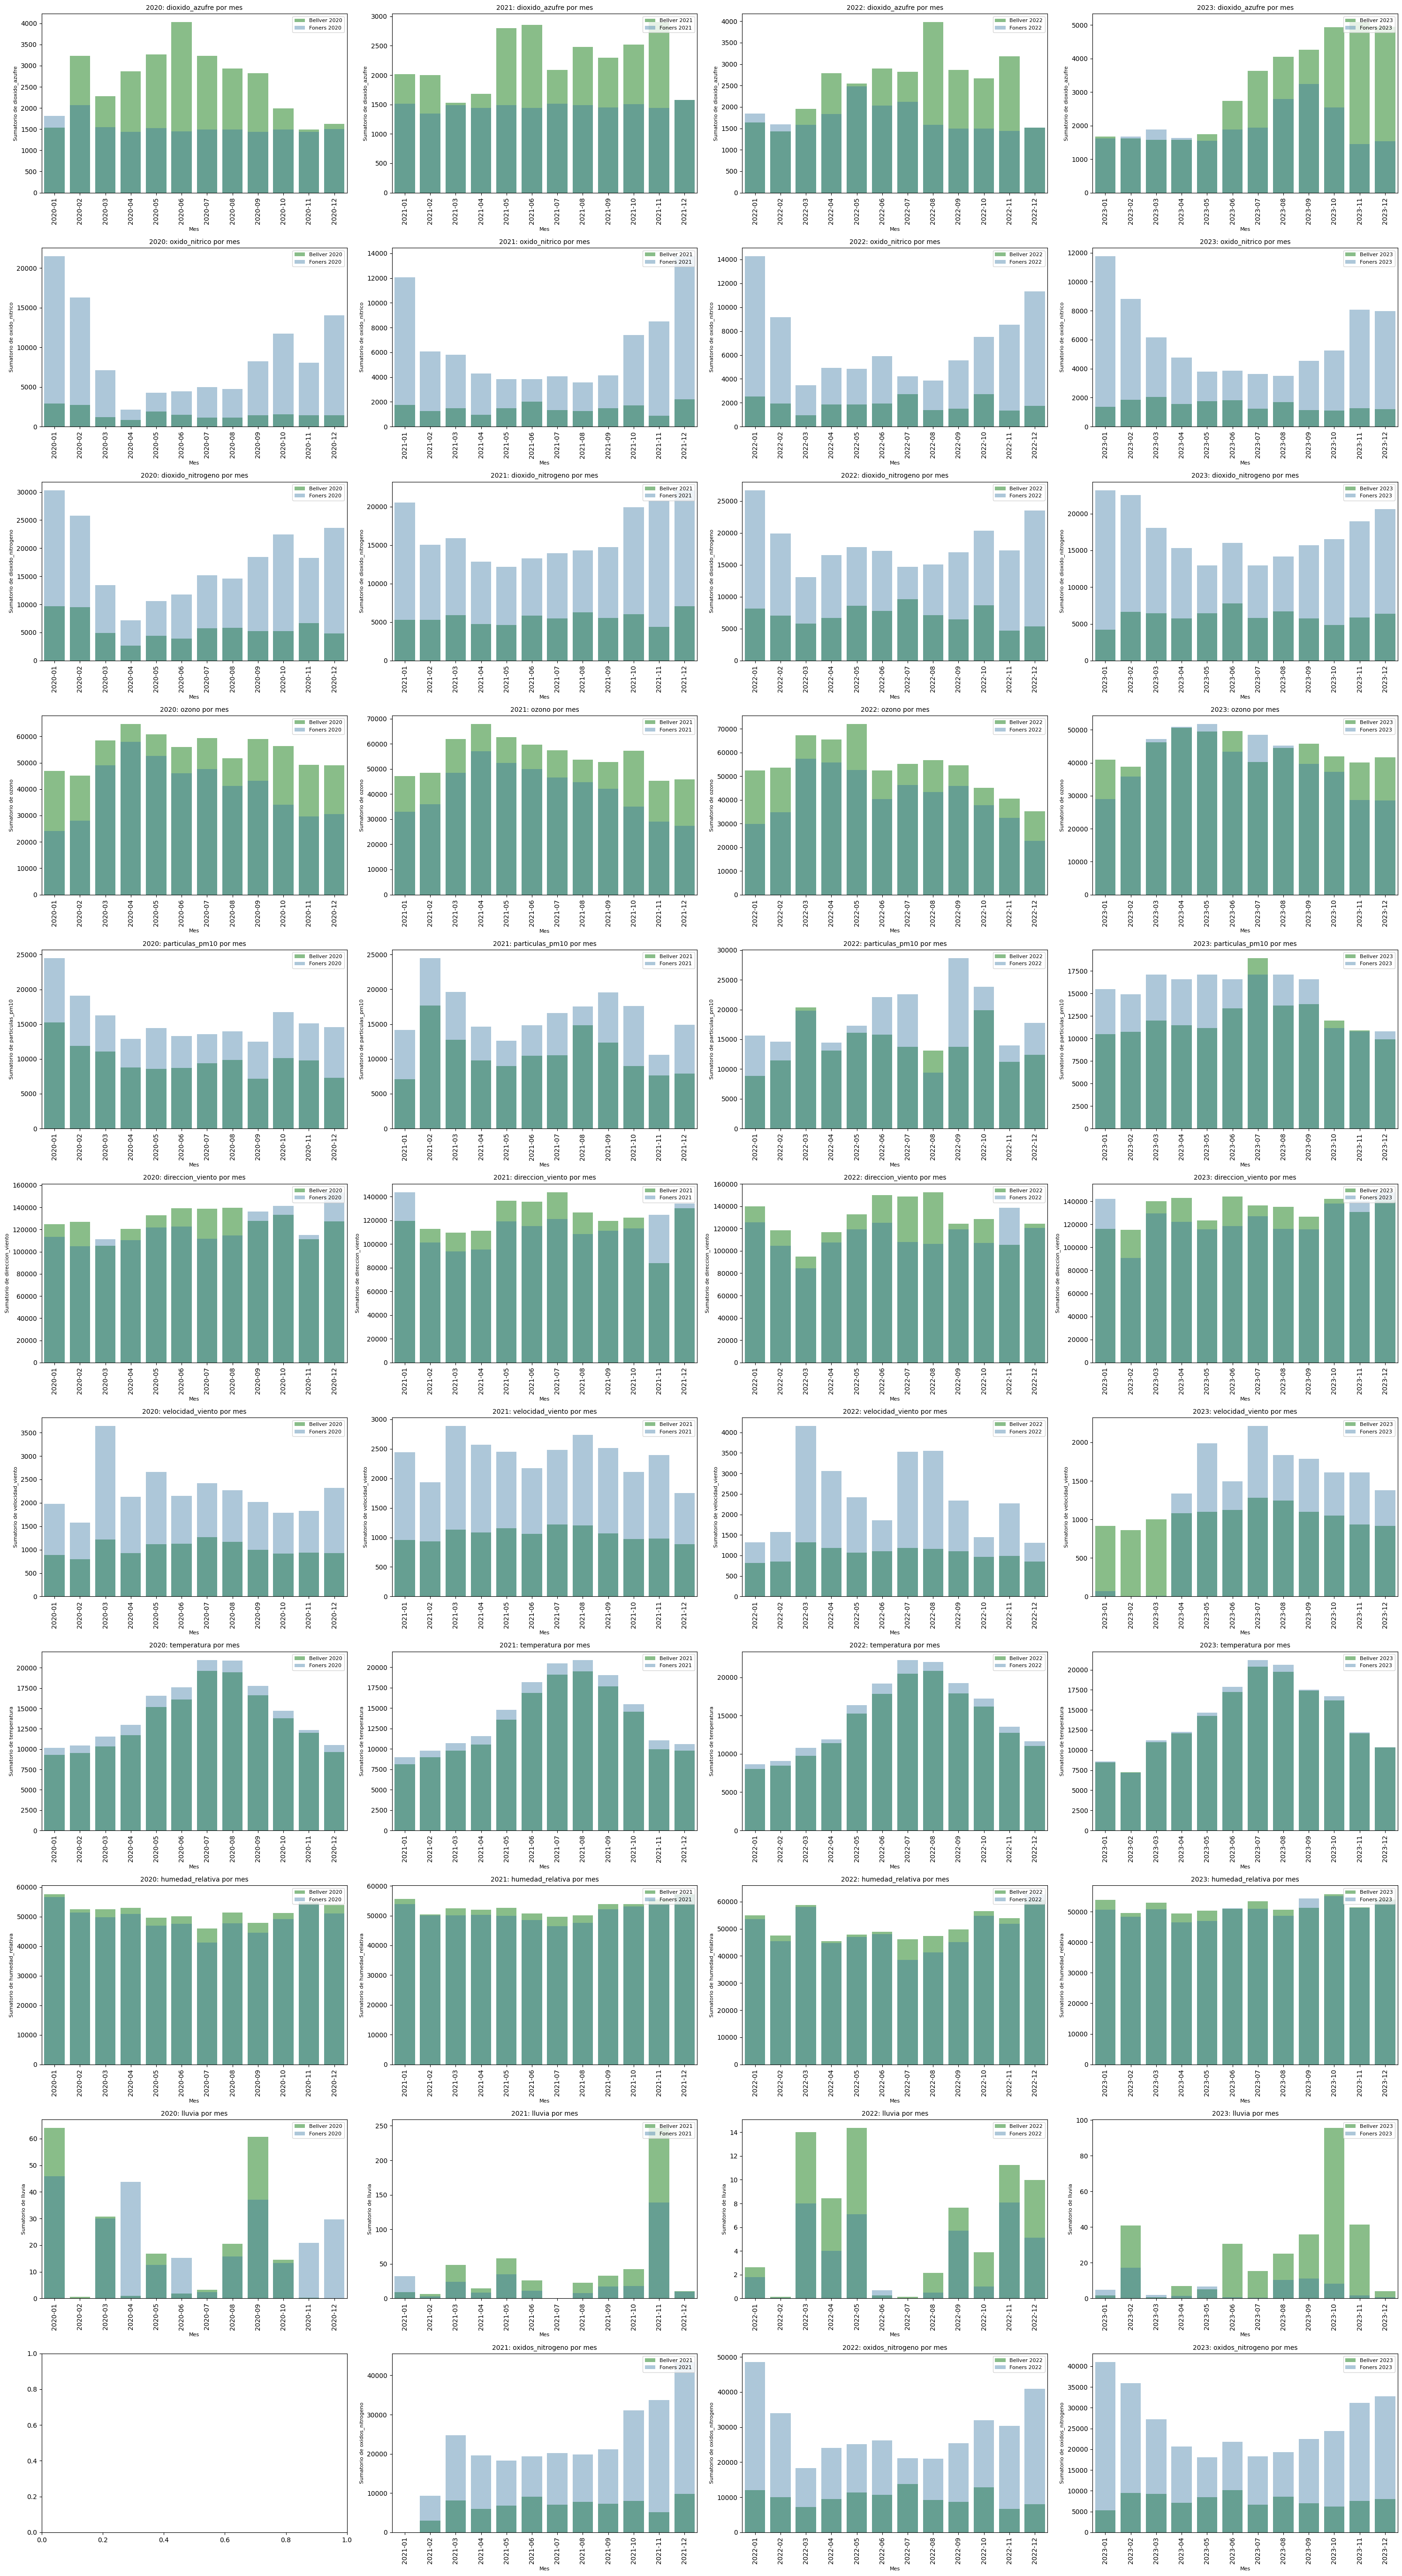

In [21]:
def group_by_month(df):
    df['fecha'] = pd.to_datetime(df['fecha'])
    df['mes'] = df['fecha'].dt.to_period('M')
    grouped_month_df = df.groupby('mes').sum(numeric_only=True).reset_index()
    grouped_month_df['mes'] = grouped_month_df['mes'].astype(str)
    return grouped_month_df

grouped_month_df_2020 = group_by_month(df_2020)
grouped_month_df_foners_2020 = group_by_month(df_foners_2020)
grouped_month_df_2021 = group_by_month(df_2021)
grouped_month_df_foners_2021 = group_by_month(df_foners_2021)
grouped_month_df_2022 = group_by_month(df_2022)
grouped_month_df_foners_2022 = group_by_month(df_foners_2022)
grouped_month_df_2023 = group_by_month(df)
grouped_month_df_foners_2023 = group_by_month(df_foners)

plots = [
    'dioxido_azufre',
    'oxido_nitrico',
    'dioxido_nitrogeno',
    'ozono',
    'particulas_pm10',
    'direccion_viento',
    'velocidad_viento',
    'temperatura',
    'humedad_relativa',
    'lluvia',
    'oxidos_nitrogeno'
]


num_plots = len(plots)
fig, axes = plt.subplots(nrows=num_plots, ncols=4, figsize=(30, num_plots * 5))


color_bellver = "#2ca02c"  
color_foners = "#1f77b4"   


for i, plot in enumerate(plots):

    if plot in grouped_month_df_2020.columns and plot in grouped_month_df_foners_2020.columns:
        sns.barplot(data=grouped_month_df_2020, x='mes', y=plot, ax=axes[i, 0], color=color_bellver, label='Bellver 2020', alpha=0.6)
        sns.barplot(data=grouped_month_df_foners_2020, x='mes', y=plot, ax=axes[i, 0], color=color_foners, label='Foners 2020', alpha=0.4)
        axes[i, 0].set_title(f'2020: {plot} por mes', fontsize=10)
        axes[i, 0].set_xlabel('Mes', fontsize=8)
        axes[i, 0].set_ylabel(f'Sumatorio de {plot}', fontsize=8)
        axes[i, 0].tick_params(axis='x', rotation=90)
        axes[i, 0].grid(False)
        axes[i, 0].legend(loc='upper right', fontsize=8)


    if plot in grouped_month_df_2021.columns and plot in grouped_month_df_foners_2021.columns:
        sns.barplot(data=grouped_month_df_2021, x='mes', y=plot, ax=axes[i, 1], color=color_bellver, label='Bellver 2021', alpha=0.6)
        sns.barplot(data=grouped_month_df_foners_2021, x='mes', y=plot, ax=axes[i, 1], color=color_foners, label='Foners 2021', alpha=0.4)
        axes[i, 1].set_title(f'2021: {plot} por mes', fontsize=10)
        axes[i, 1].set_xlabel('Mes', fontsize=8)
        axes[i, 1].set_ylabel(f'Sumatorio de {plot}', fontsize=8)
        axes[i, 1].tick_params(axis='x', rotation=90)
        axes[i, 1].grid(False)
        axes[i, 1].legend(loc='upper right', fontsize=8)


    if plot in grouped_month_df_2022.columns and plot in grouped_month_df_foners_2022.columns:
        sns.barplot(data=grouped_month_df_2022, x='mes', y=plot, ax=axes[i, 2], color=color_bellver, label='Bellver 2022', alpha=0.6)
        sns.barplot(data=grouped_month_df_foners_2022, x='mes', y=plot, ax=axes[i, 2], color=color_foners, label='Foners 2022', alpha=0.4)
        axes[i, 2].set_title(f'2022: {plot} por mes', fontsize=10)
        axes[i, 2].set_xlabel('Mes', fontsize=8)
        axes[i, 2].set_ylabel(f'Sumatorio de {plot}', fontsize=8)
        axes[i, 2].tick_params(axis='x', rotation=90)
        axes[i, 2].grid(False)
        axes[i, 2].legend(loc='upper right', fontsize=8)

 
    if plot in grouped_month_df_2023.columns and plot in grouped_month_df_foners_2023.columns:
        sns.barplot(data=grouped_month_df_2023, x='mes', y=plot, ax=axes[i, 3], color=color_bellver, label='Bellver 2023', alpha=0.6)
        sns.barplot(data=grouped_month_df_foners_2023, x='mes', y=plot, ax=axes[i, 3], color=color_foners, label='Foners 2023', alpha=0.4)
        axes[i, 3].set_title(f'2023: {plot} por mes', fontsize=10)
        axes[i, 3].set_xlabel('Mes', fontsize=8)
        axes[i, 3].set_ylabel(f'Sumatorio de {plot}', fontsize=8)
        axes[i, 3].tick_params(axis='x', rotation=90)
        axes[i, 3].grid(False)
        axes[i, 3].legend(loc='upper right', fontsize=8)


plt.tight_layout()
plt.show()

# Análisis Compuesto de la Distribución de Contaminantes por Año y Mes

## Observaciones Generales:
Los gráficos presentan la evolución mensual de varios contaminantes desde el año 2018 hasta 2023 en las estaciones de **Bellver** y **Foners**, lo que permite observar patrones temporales y diferencias geográficas en la calidad del aire.

---

## Análisis por Contaminante:

### 1. **Dióxido de Azufre (SO₂)**:
   - **Patrón General**:
     - En **Bellver**, los niveles de SO₂ son consistentemente más altos que en **Foners**, lo que sugiere una influencia clara del puerto y del tráfico marítimo.
   - **Tendencia Interanual**:
     - Los niveles de SO₂ en **Bellver** tienden a ser más altos durante los meses de verano y otoño, posiblemente debido a la actividad turística y marítima.
     - En **Foners**, los niveles son significativamente más bajos y apenas presentan variaciones interanuales.
   - **Estacionalidad**:
     - Los picos se observan en los meses de otoño e invierno, especialmente entre octubre y diciembre.

### 2. **Óxido Nítrico (NO)**:
   - **Patrón General**:
     - **Foners** registra niveles significativamente más altos de NO en comparación con **Bellver**, lo que refleja la influencia del tráfico urbano en el núcleo de Palma.
   - **Tendencia Interanual**:
     - Se observa una reducción gradual de los niveles de NO en ambas estaciones a lo largo de los años, lo que podría estar relacionado con políticas de reducción de emisiones vehiculares.
   - **Estacionalidad**:
     - Los niveles tienden a ser más bajos durante los meses de verano (junio-agosto), cuando la dispersión de contaminantes es favorecida por condiciones atmosféricas más cálidas.

### 3. **Ozono (O₃)**:
   - **Patrón General**:
     - **Bellver** muestra consistentemente niveles más altos de ozono que **Foners**, probablemente debido a su ubicación más alejada de fuentes directas de NOx, lo que favorece la formación de ozono.
   - **Tendencia Interanual**:
     - Los niveles de ozono son relativamente estables entre años, con ligeros incrementos en verano.
   - **Estacionalidad**:
     - El ozono alcanza su pico en los meses de verano (julio-agosto), debido a temperaturas más altas y mayor radiación solar.

### 4. **Partículas PM10**:
   - **Patrón General**:
     - **Foners** registra niveles más altos de partículas PM10 en comparación con **Bellver**, reflejando su mayor exposición al tráfico y actividades urbanas.
   - **Tendencia Interanual**:
     - Los niveles de partículas parecen relativamente estables a lo largo de los años, con ligeros incrementos en meses específicos.
   - **Estacionalidad**:
     - Los niveles son más altos en primavera (abril-mayo) y otoño (septiembre-octubre), probablemente debido a actividad urbana o condiciones meteorológicas favorables para la acumulación.

---

## Conclusiones Combinadas:
1. **Tendencias a Largo Plazo**:
   - Se observa una ligera mejora en la calidad del aire en ambas estaciones a lo largo de los años, con reducciones en contaminantes como el óxido nítrico.

2. **Estacionalidad**:
   - El verano muestra un aumento en ozono y una reducción en óxidos de nitrógeno, mientras que otoño e invierno presentan picos en SO₂ y partículas.



In [22]:

from IPython.display import display_html


def calculate_mean_comparison(df_bellver, df_foners, year):

    if 'hora' in df_bellver.columns:
        df_bellver = df_bellver.drop(columns=['hora'])
    if 'hora' in df_foners.columns:
        df_foners = df_foners.drop(columns=['hora'])


    common_numeric_cols = df_bellver.select_dtypes(include=[np.number]).columns.intersection(
        df_foners.select_dtypes(include=[np.number]).columns
    )


    mean_df = df_bellver[common_numeric_cols].mean()
    mean_df_foners = df_foners[common_numeric_cols].mean()


    mean_combined_df = pd.DataFrame({
        'Bellver': mean_df.values,
        'Foners': mean_df_foners.values
    }, index=common_numeric_cols)

    mean_combined_df['Max'] = np.where(mean_combined_df['Bellver'] >= mean_combined_df['Foners'], 'Bellver', 'Foners')

    mean_combined_df = mean_combined_df.sort_values(by='Max', ascending=False)

    mean_combined_df.drop(columns='Max', inplace=True)

    def highlight_max(data, color='lightblue'):
        '''
        Resalta el valor máximo de cada fila en azul.
        '''
        attr = f'background-color: {color}'
        is_max = data == data.max(axis=1, skipna=True).values[:, None]
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)

    styled_df = mean_combined_df.style.apply(highlight_max, axis=None)

    styled_df.set_caption(f'Comparación de Medias - {year}')
    
    styled_df.set_table_styles([
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '12px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('font-size', '10px'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '10px')]}
    ])

    return styled_df



styled_df_2020 = calculate_mean_comparison(df_2020, df_foners_2020, '2020')
styled_df_2021 = calculate_mean_comparison(df_2021, df_foners_2021, '2021')
styled_df_2022 = calculate_mean_comparison(df_2022, df_foners_2022, '2022')
styled_df_2023 = calculate_mean_comparison(df, df_foners, '2023')

styled_tables_html = f"""
<div style="display: flex; flex-direction: row; justify-content: space-between; align-items: flex-start;">
    <div style="padding-right: 10px; width: 20%;">{styled_df_2020._repr_html_()}</div>
    <div style="padding-right: 10px; width: 20%;">{styled_df_2021._repr_html_()}</div>
    <div style="padding-right: 10px; width: 20%;">{styled_df_2022._repr_html_()}</div>
    <div style="width: 20%;">{styled_df_2023._repr_html_()}</div>
</div>
"""
display_html(styled_tables_html, raw=True)


Comparación de Medias - 2020 
 
 
   
 Bellver 
 Foners 
 
 
 
 
 oxido_nitrico 
 2.177618 
 12.244775 
 
 
 dioxido_nitrogeno 
 7.819217 
 24.095970 
 
 
 particulas_pm10 
 13.408584 
 21.272261 
 
 
 velocidad_viento 
 1.396847 
 3.049932 
 
 
 temperatura 
 18.596835 
 20.089378 
 
 
 lluvia 
 0.024362 
 0.030305 
 
 
 dioxido_azufre 
 3.564094 
 2.128643 
 
 
 ozono 
 74.703780 
 55.038593 
 
 
 direccion_viento 
 173.921334 
 165.777436 
 
 
 humedad_relativa 
 70.692737 
 67.408698 
 
 
 
 
 
 
 Comparación de Medias - 2021 
 
 
   
 Bellver 
 Foners 
 
 
 
 
 oxido_nitrico 
 2.039897 
 8.834110 
 
 
 dioxido_nitrogeno 
 7.583790 
 22.334018 
 
 
 particulas_pm10 
 14.713356 
 22.502740 
 
 
 velocidad_viento 
 1.444315 
 3.246404 
 
 
 temperatura 
 18.079098 
 19.572306 
 
 
 oxidos_nitrogeno 
 10.261445 
 34.159106 
 
 
 dioxido_azufre 
 3.051826 
 2.019178 
 
 
 ozono 
 75.282877 
 57.264954 
 
 
 direccion_viento 
 165.767580 
 157.714041 
 
 
 humedad_relativa 
 72.386301 
 69.976826 
 
 
 lluvia 
 0.059075 
 0.034863 
 
 
 
 
 
 
 Comparación de Medias - 2022 
 
 
   
 Bellver 
 Foners 
 
 
 
 
 oxido_nitrico 
 2.565046 
 9.535285 
 
 
 dioxido_nitrogeno 
 9.799429 
 24.998630 
 
 
 particulas_pm10 
 19.366096 
 25.110274 
 
 
 velocidad_viento 
 1.435902 
 3.290674 
 
 
 temperatura 
 19.406164 
 20.773242 
 
 
 oxidos_nitrogeno 
 13.705833 
 39.612580 
 
 
 dioxido_azufre 
 3.456621 
 2.400685 
 
 
 ozono 
 74.199429 
 56.889384 
 
 
 direccion_viento 
 175.371347 
 155.933562 
 
 
 humedad_relativa 
 70.542808 
 67.511872 
 
 
 lluvia 
 0.008538 
 0.004800 
 
 
 
 
 
 
 Comparación de Medias - 2023 
 
 
   
 Bellver 
 Foners 
 
 
 
 
 oxido_nitrico 
 2.059326 
 8.235263 
 
 
 dioxido_nitrogeno 
 8.284361 
 23.638128 
 
 
 particulas_pm10 
 16.954110 
 20.686530 
 
 
 velocidad_viento 
 1.438744 
 1.750126 
 
 
 temperatura 
 18.994806 
 19.451804 
 
 
 oxidos_nitrogeno 
 10.704167 
 35.758539 
 
 
 dioxido_azufre 
 4.319635 
 2.711758 
 
 
 ozono 
 60.497945 
 55.467009 
 
 
 direccion_viento 
 181.856849 
 171.650571 
 
 
 humedad_relativa 
 71.160160 
 69.428995 
 
 
 lluvia 
 0.034584 
 0.007446

In [23]:
combined_df = pd.concat([df_2021, df_2022, df], ignore_index=True)

combined_df.drop(columns='oxidos_nitrogeno', inplace=True)

combined_df.shape

df.to_csv('combinedbellver.csv', index=False)
combined_df.shape

df.to_csv('bellver2024real.csv' , index=False)

In [24]:
combined_df = combined_df.ffill()
combined_df.isnull().sum()

fecha                    0
hora                     0
dioxido_azufre           0
oxido_nitrico            0
dioxido_nitrogeno        0
ozono                    0
particulas_pm10          0
direccion_viento         0
velocidad_viento         0
temperatura              0
humedad_relativa         0
lluvia                   0
mes                      0
dia                  17520
dtype: int64

In [ ]:
combined_df.shape

# Predicción de Niveles del Aire: Aproximaciones Predictivas

## Modelos Propuestos:
Se prueban dos aproximaciones a modelos predictivos para los datos disponibles con el objetivo de predecir los niveles del aire a futuro.  
La primera aproximación utiliza un modelo de multisalida de regresión implementado con **Sci-kit Learn**.

---

## Consideraciones Previas:

1. **Outliers**:
   - Dado que trabajamos con series temporales, eliminar filas con outliers puede generar irregularidades en los datos.
   - En lugar de eliminarlos, se han seleccionado modelos de regresión robustos para mitigar su impacto.

2. **Datos Faltantes**:
   - Los datos faltantes se han imputado utilizando **forward fill** para mantener los patrones originales.
   - No se han eliminado filas por la misma razón que los outliers.

3. **Ajuste de Hiperparámetros**:
   - Se utilizó una **búsqueda en rejilla** para encontrar los mejores hiperparámetros del modelo.
   - **Mejor modelo encontrado**:
     ```python
     {
         'regressor__estimator__max_depth': 10,
         'regressor__estimator__min_samples_leaf': 2,
         'regressor__estimator__min_samples_split': 10,
         'regressor__estimator__n_estimators': 150
     }
     ```

4. **Cantidad de Datos**:
   - El dataset combina datos de varios años, resultando en **26,280 filas**, suficiente para la mayoría de los modelos.

---

## Conclusiones:

1. **Desempeño del Modelo**:
   - Las métricas indican que el modelo tiene un rendimiento **inferior al azar**.
   - Aunque la **accuracy** para **óxido nítrico** fue alta (0.9686), el **recall** fue bajo en todos los casos.
   - El **MSE** de 1322.93 está **fuera de lo aceptable**, indicando un desempeño muy pobre.

2. **Complejidad de los Datos**:
   - Los patrones en los datos son altamente complejos, lo que sugiere que los modelos clásicos de aprendizaje supervisado pueden no ser óptimos.
   - La presencia de numerosos outliers (probablemente debidos a alta varianza y no a errores de medición) añade dificultad al ajuste.

3. **Próximos Pasos**:
   - Implementar un modelo de **deep learning** basado en **LSTM (Long-Short Term Memory)** con **mecanismo de atención** y salida múltiple.
   - Explorar modelos que predigan **una sola variable** en lugar de todas simultáneamente.

---

## Intentos Adicionales:

Se probaron otros modelos como **XGBoost**, **CatBoost** y **LGBMRegressor**, logrando mejoras, pero ninguno obtuvo un coeficiente **R² mayor a 0**, lo que indica que los modelos no son utilizables en su estado actual.

---


In [ ]:

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore")

combined_df['fecha'] = pd.to_datetime(combined_df['fecha'])

combined_df['dia_del_ano'] = combined_df['fecha'].dt.dayofyear
combined_df['dia_de_la_semana'] = combined_df['fecha'].dt.dayofweek

print(combined_df['hora'].head())  


combined_df['hora'] = pd.to_numeric(combined_df['hora'], errors='coerce')

print(combined_df['hora'].dtype)


X = combined_df[['dia_del_ano', 'dia_de_la_semana', 'hora', 'temperatura', 'humedad_relativa', 'lluvia']]
y = combined_df[['dioxido_azufre', 'oxido_nitrico', 'dioxido_nitrogeno', 'ozono', 'particulas_pm10', 'direccion_viento', 'velocidad_viento']]


train_df = combined_df[combined_df['fecha'] < '2023-09-01']
test_df = combined_df[combined_df['fecha'] >= '2023-09-01']

X_train = train_df[['dia_del_ano', 'dia_de_la_semana', 'hora', 'temperatura', 'humedad_relativa', 'lluvia']]
y_train = train_df[['dioxido_azufre', 'oxido_nitrico', 'dioxido_nitrogeno', 'ozono', 'particulas_pm10', 'direccion_viento', 'velocidad_viento']]

X_test = test_df[['dia_del_ano', 'dia_de_la_semana', 'hora', 'temperatura', 'humedad_relativa', 'lluvia']]
y_test = test_df[['dioxido_azufre', 'oxido_nitrico', 'dioxido_nitrogeno', 'ozono', 'particulas_pm10', 'direccion_viento', 'velocidad_viento']]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(random_state=42)))
])


param_grid = {
    'regressor__estimator__n_estimators': [50, 100, 150],
    'regressor__estimator__max_depth': [None, 10, 20],
    'regressor__estimator__min_samples_split': [2, 5, 10],
    'regressor__estimator__min_samples_leaf': [1, 2, 4]
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo encontrado: {grid_search.best_params_}")
print(f"MSE: {mse}, R2: {r2}")


def calculate_classification_metrics(y_true, y_pred, variable_name):
    y_true_class = np.digitize(y_true, bins=np.linspace(y_true.min(), y_true.max(), 10))
    y_pred_class = np.digitize(y_pred, bins=np.linspace(y_true.min(), y_true.max(), 10))
    
    accuracy = accuracy_score(y_true_class, y_pred_class)
    recall = recall_score(y_true_class, y_pred_class, average='macro')
    f1 = f1_score(y_true_class, y_pred_class, average='macro')
    
    print(f"{variable_name} - Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

for i, column in enumerate(y_test.columns):
    calculate_classification_metrics(y_test.iloc[:, i], y_pred[:, i], column)


fechas_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

X_2024 = pd.DataFrame({
    'dia_del_ano': fechas_2024.dayofyear,
    'dia_de_la_semana': fechas_2024.dayofweek,
    'hora': 12,  # Suponiendo que estamos prediciendo para el mediodía
    'temperatura': np.mean(X['temperatura']),  # Usamos el promedio de la temperatura histórica como ejemplo
    'humedad_relativa': np.mean(X['humedad_relativa']),
    'lluvia': np.mean(X['lluvia'])
})

predicciones_2024 = best_model.predict(X_2024)

regression2024 = pd.DataFrame(predicciones_2024, columns=y.columns)
regression2024['fecha'] = fechas_2024

print(regression2024.head())


# Implementación de un Modelo de Deep Learning para Forecasting

Después de probar con modelos de aprendizaje supervisado, se implementó un modelo de **deep learning** para mejorar los resultados. Para este propósito, se utilizó **Google Colab** para aprovechar GPUs más potentes. El cuaderno utilizado está disponible en el siguiente enlace:

[Google Colab Notebook](https://colab.research.google.com/drive/1AEBeHzZZPbCc41pmV1_vXBBvvms1tv12?authuser=0#scrollTo=m65_vcW9Af-G)

---

## Características del Modelo:

1. **Búsqueda de Hiperparámetros**:
   - Se utilizó **Optuna** para buscar el mejor modelo posible.
2. **Tipo de Red Neuronal**:
   - El modelo óptimo seleccionado para series temporales fue una **LSTM (Long Short-Term Memory)**.
3. **Mecanismo de Atención**:
   - Se incorporó atención para mejorar las predicciones en secuencias temporales.
4. **Salida**:
   - El código devuelve un **dataframe con las predicciones**, similar al modelo de Sci-kit Learn.

---

## Ajustes y Mejoras Aplicados:

Dado que los resultados iniciales no fueron satisfactorios, se realizaron los siguientes ajustes:

1. **Comparación de Modelos**:
   - Se incorporó un segundo modelo basado en **GRU (Gated Recurrent Unit)** para comparar resultados estadísticamente.
2. **Expansión del Rango de Hiperparámetros**:
   - Optuna se utilizó con un rango de búsqueda más amplio para optimizar el modelo.
3. **Gradient Clipping**:
   - Se añadió un mecanismo de **gradient clipping** para evitar problemas de **exploding** y **vanishing gradients** durante el entrenamiento.
4. **Inicialización de Pesos**:
   - Se implementó una inicialización de pesos adecuada (**Xavier/He**) para estabilizar el entrenamiento.

---

## Resultados Obtenidos:

### **Modelo GRU**:
- **MSE (Mean Squared Error)**: 1.1963  
- **MAE (Mean Absolute Error)**: 0.7093  
- **R² Score**: -2.3909  

### **Modelo LSTM**:
- **MSE (Mean Squared Error)**: 1.0339  
- **MAE (Mean Absolute Error)**: 0.6399  
- **R² Score**: -1.4562  

---

## Mejores Resultados de Deep Learning:

A pesar de iteraciones adicionales y mejoras, los mejores resultados obtenidos con deep learning fueron los siguientes, los cuales siguen siendo inutilizables debido al R² negativo:

- **MSE (Mean Squared Error)**: 0.0260  
- **MAE (Mean Absolute Error)**: 0.1295  
- **R² Score**: -0.1771  
- **RMSE (Root Mean Squared Error)**: 0.1613  

---

## Conclusión:

A pesar de los ajustes realizados, los resultados obtenidos con deep learning no fueron satisfactorios para este problema de forecasting. Los modelos presentan un **R² negativo**, lo que indica que no son utilizables en su estado actual. Se requiere explorar nuevas arquitecturas o enfoques para mejorar el desempeño.




Decido usar métodos más automáticos. Pruebo con Prophet. Los resultados son desiguales. El dióxido de azufre o el ozono dan resultados factibles pero la humedad o las particulas en suspensión arrojan datos que por conocimiento del ambiente no pueden darse. 

Aquí los resultados de Prophet : 

In [ ]:

# Cargar los archivos CSV en DataFrames de pandas
dioxido_azufre_df = pd.read_csv('dioxido_azufre_2024_prophet.csv')
dioxido_nitrogeno_df = pd.read_csv('dioxido_nitrogeno_2024_prophet.csv')
direccion_viento_df = pd.read_csv('direccion_viento_2024_prophet.csv')
humedad_relativa_df = pd.read_csv('humedad_relativa_2024_prophet.csv')
lluvia_df = pd.read_csv('lluvia_2024_prophet.csv')
oxido_nitrico_df = pd.read_csv('oxido_nitrico_2024_prophet.csv')
oxidos_nitrogeno_df = pd.read_csv('oxidos_nitrogeno_2024_prophet.csv')
ozono_df = pd.read_csv('ozono_2024_prophet.csv')
particulas_pm10_df = pd.read_csv('particulas_pm10_2024_prophet.csv')

# Crear una lista de DataFrames y sus nombres correspondientes
dataframes = [
    ('dioxido_azufre', dioxido_azufre_df),
    ('dioxido_nitrogeno', dioxido_nitrogeno_df),
    ('direccion_viento', direccion_viento_df),
    ('humedad_relativa', humedad_relativa_df),
    ('lluvia', lluvia_df),
    ('oxido_nitrico', oxido_nitrico_df),
    ('oxidos_nitrogeno', oxidos_nitrogeno_df),
    ('ozono', ozono_df),
    ('particulas_pm10', particulas_pm10_df),
]

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Graficar cada DataFrame
for name, df in dataframes:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='ds', y='yhat', data=df, label=name)
    plt.fill_between(df['ds'], df['yhat_lower'], df['yhat_upper'], alpha=0.2)
    plt.title(f'Forecast for {name}')
    plt.ylabel(name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Intentos de Predicción

Se realizaron diversos intentos de predicción utilizando diferentes enfoques y técnicas, con el objetivo de encontrar el mejor modelo para predecir los niveles de calidad del aire. A continuación, se detallan los métodos empleados:

---

## Métodos Probados:

1. **Deep Learning**:
   - **LSTM (Long Short-Term Memory)**
   - **GRU (Gated Recurrent Unit)**
   - **Transformer**

2. **Machine Learning Supervisado**:
   - **MultiOutputRegressor**
   - **Random Forest Regressor**

3. **Modelos Basados en Foundation Models**:
   - **Prophet**

4. **Workflows de Auto ML**:
   - **PyCaret**

5. **Modelos Estadísticos**:
   - **ARIMA (Autoregressive Integrated Moving Average)**
   - **SARIMA (Seasonal ARIMA)**

---

## Mejora en los Resultados:

Al cambiar el enfoque y utilizar **10 años de datos históricos**, los resultados mejoraron de manera significativa. Finalmente, se optó por presentar las predicciones obtenidas con **Prophet**, ya que demostraron ser las más interesantes y relevantes para el análisis.

---

## Código:

El código detallado para estos modelos y sus implementaciones se encuentra disponible en el documento de Google Colab.



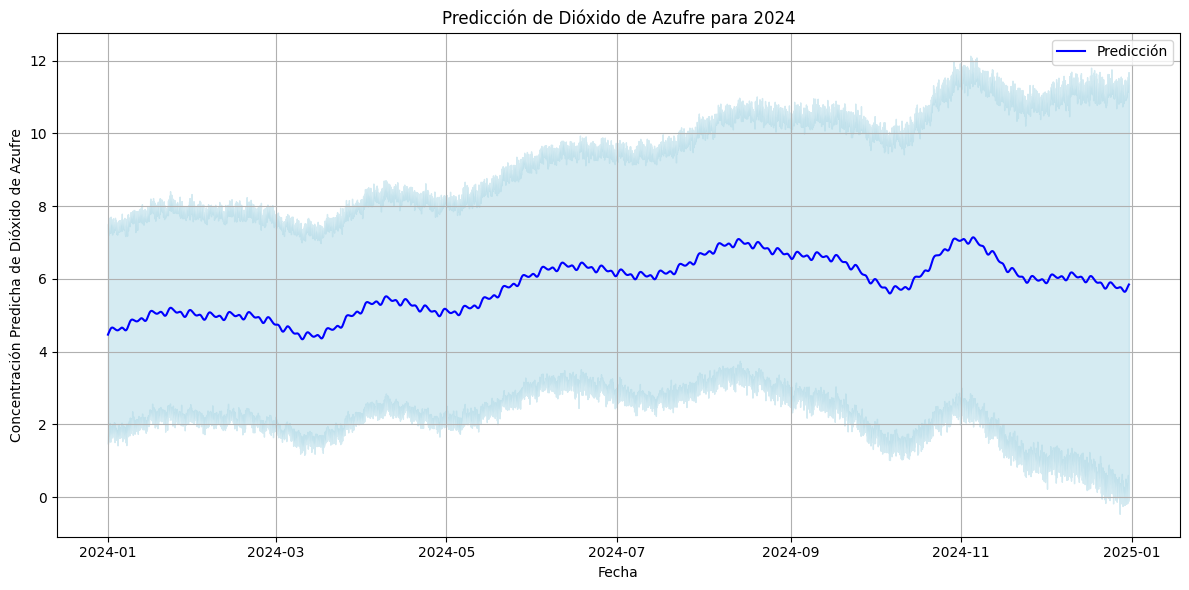


Muestra de Predicciones para 2024:
                        ds      yhat  yhat_lower  yhat_upper
122688 2024-01-01 00:00:00  4.463980    1.462531    7.512943
122689 2024-01-01 01:00:00  4.470672    1.647485    7.316556
122690 2024-01-01 02:00:00  4.477599    1.757448    7.202781
122691 2024-01-01 03:00:00  4.484733    1.776335    7.392594
122692 2024-01-01 04:00:00  4.492067    1.732418    7.336110


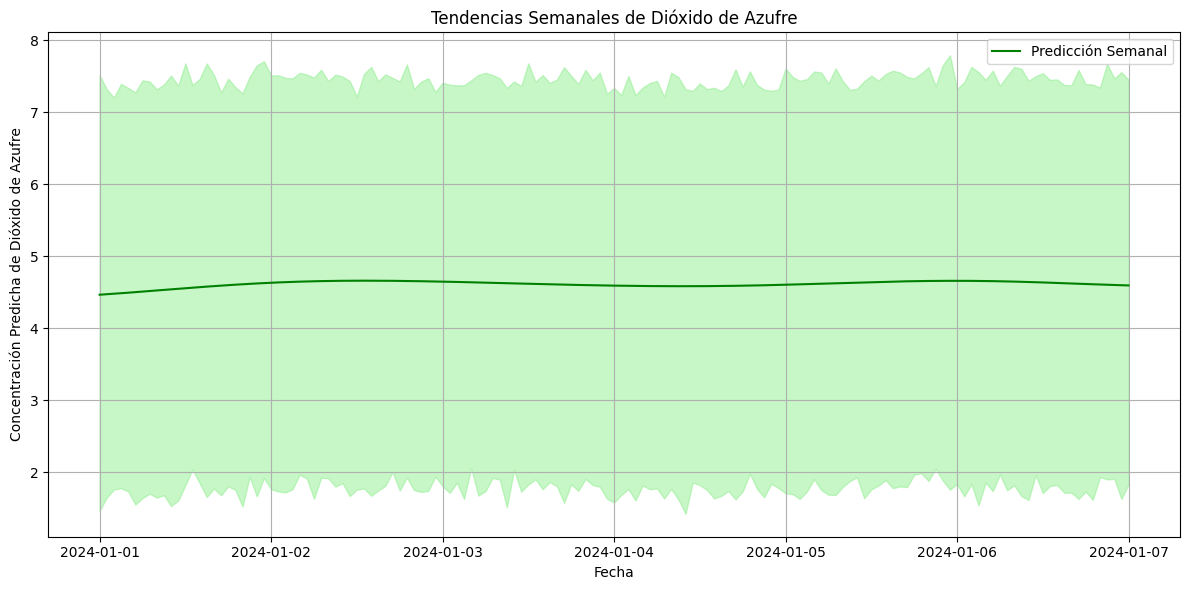

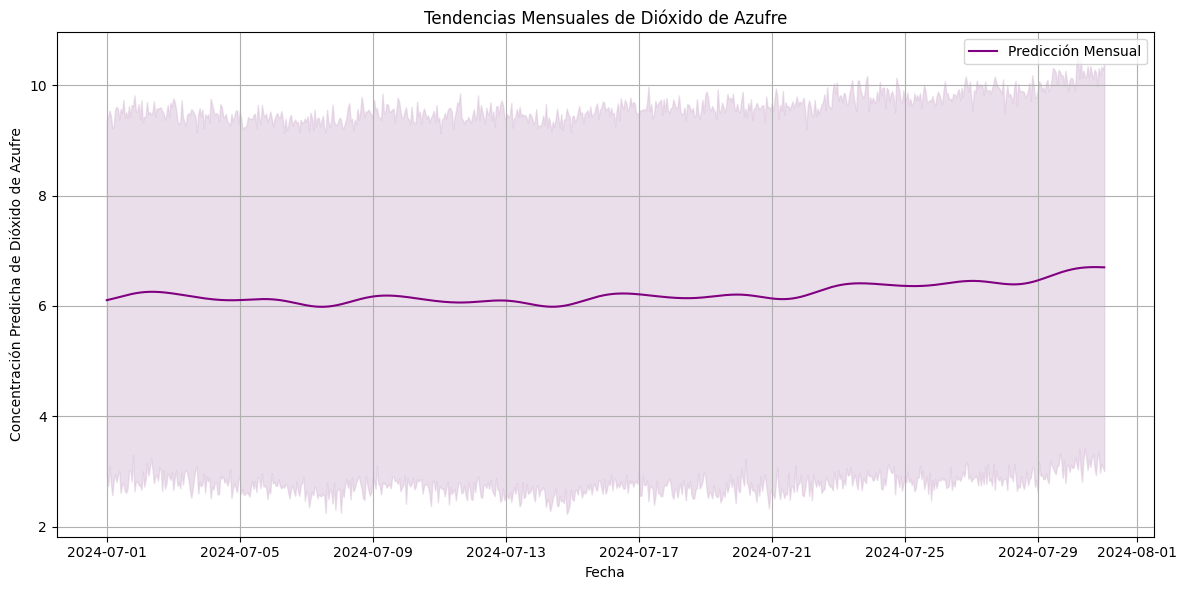

In [33]:
#### forecast = pd.read_csv('predicciones_dioxidoazufre_2024.csv')

# Convertir la columna 'ds' a tipo datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filtrar los datos para mostrar solo 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Visualizar las predicciones solo para 2024
plt.figure(figsize=(12, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Predicción', color='blue')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='lightblue', alpha=0.5)
plt.title('Predicción de Dióxido de Azufre para 2024')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Dióxido de Azufre')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir algunas predicciones para verificación
print("\nMuestra de Predicciones para 2024:")
print(forecast_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


# Graficar una semana típica para ver las tendencias diarias
plt.figure(figsize=(12, 6))
start_date = '2024-01-01'
end_date = '2024-01-07'
week_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
plt.plot(week_data['ds'], week_data['yhat'], label='Predicción Semanal', color='green')
plt.fill_between(week_data['ds'], week_data['yhat_lower'], week_data['yhat_upper'], color='lightgreen', alpha=0.5)
plt.title('Tendencias Semanales de Dióxido de Azufre')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Dióxido de Azufre')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar un mes típico para observar las tendencias mensuales
plt.figure(figsize=(12, 6))
start_date = '2024-07-01'
end_date = '2024-07-31'
month_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
plt.plot(month_data['ds'], month_data['yhat'], label='Predicción Mensual', color='purple')
plt.fill_between(month_data['ds'], month_data['yhat_lower'], month_data['yhat_upper'], color='thistle', alpha=0.5)
plt.title('Tendencias Mensuales de Dióxido de Azufre')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Dióxido de Azufre')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

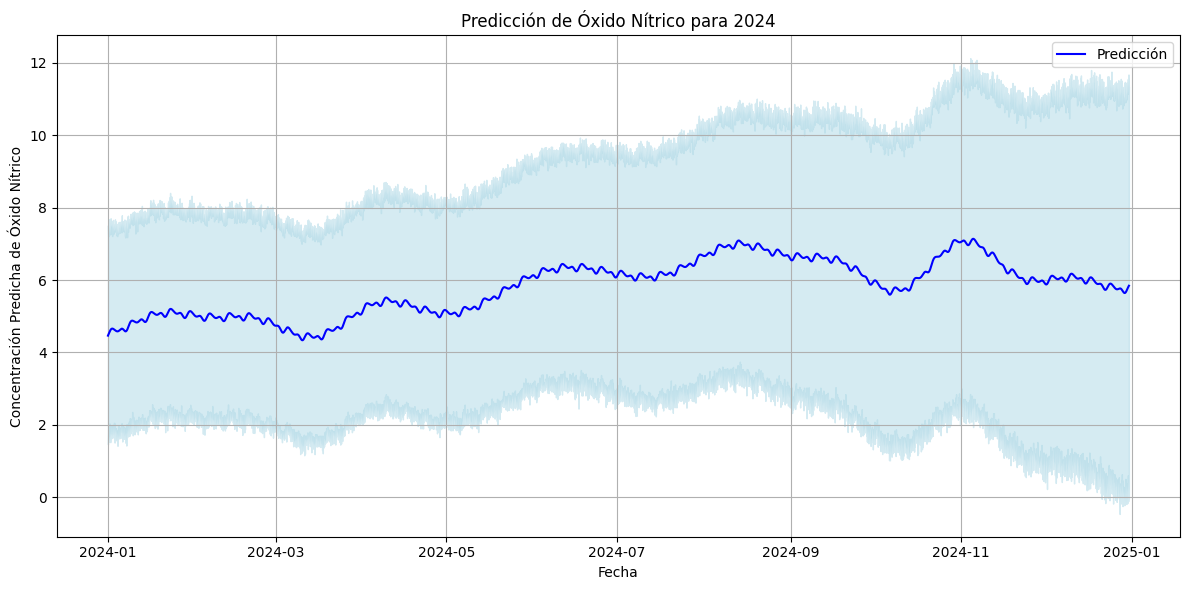

Predicciones para 2024 de Óxido Nítrico:
                        ds      yhat  yhat_lower  yhat_upper
122688 2024-01-01 00:00:00  4.463980    1.462531    7.512943
122689 2024-01-01 01:00:00  4.470672    1.647485    7.316556
122690 2024-01-01 02:00:00  4.477599    1.757448    7.202781
122691 2024-01-01 03:00:00  4.484733    1.776335    7.392594
122692 2024-01-01 04:00:00  4.492067    1.732418    7.336110


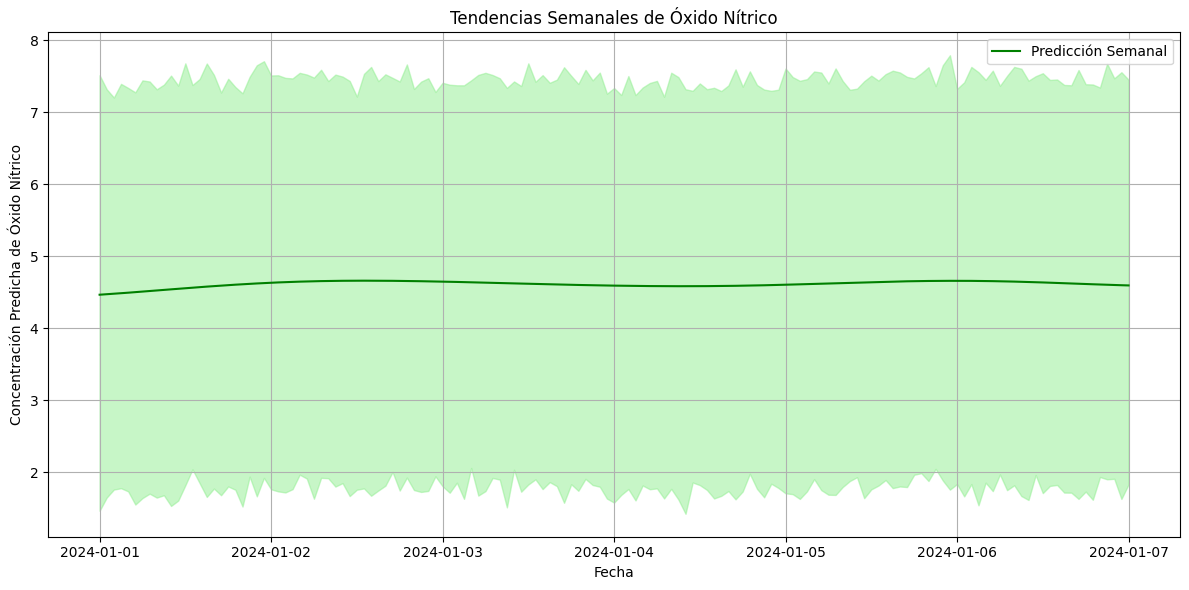

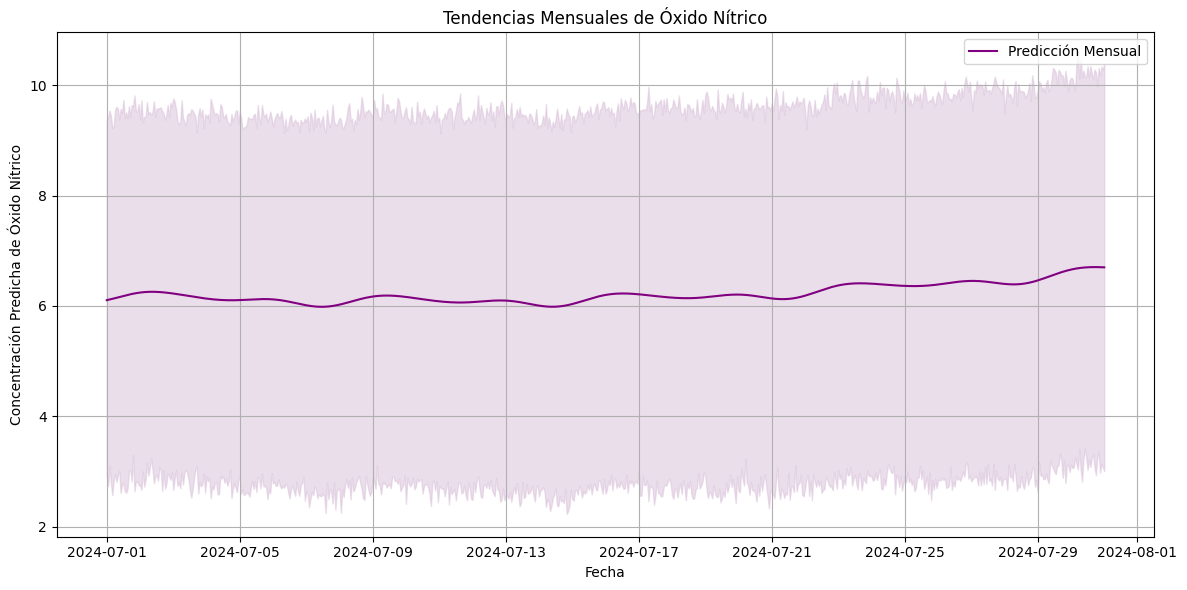

In [37]:
forecastoxido = pd.read_csv('forecastoxido.csv')

# Convertir la columna 'ds' a tipo datetime
forecastoxido['ds'] = pd.to_datetime(forecastoxido['ds'])

# Filtrar los datos para mostrar solo 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]

# Visualizar las predicciones solo para 2024
plt.figure(figsize=(12, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Predicción', color='blue')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='lightblue', alpha=0.5)
plt.title('Predicción de Óxido Nítrico para 2024')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Óxido Nítrico')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir algunas predicciones para verificación
print("Predicciones para 2024 de Óxido Nítrico:")
print(forecast_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


# Graficar una semana típica para ver las tendencias diarias
plt.figure(figsize=(12, 6))
start_date = '2024-01-01'
end_date = '2024-01-07'
week_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
plt.plot(week_data['ds'], week_data['yhat'], label='Predicción Semanal', color='green')
plt.fill_between(week_data['ds'], week_data['yhat_lower'], week_data['yhat_upper'], color='lightgreen', alpha=0.5)
plt.title('Tendencias Semanales de Óxido Nítrico')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Óxido Nítrico')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar un mes típico para observar las tendencias mensuales
plt.figure(figsize=(12, 6))
start_date = '2024-07-01'
end_date = '2024-07-31'
month_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
plt.plot(month_data['ds'], month_data['yhat'], label='Predicción Mensual', color='purple')
plt.fill_between(month_data['ds'], month_data['yhat_lower'], month_data['yhat_upper'], color='thistle', alpha=0.5)
plt.title('Tendencias Mensuales de Óxido Nítrico')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Óxido Nítrico')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

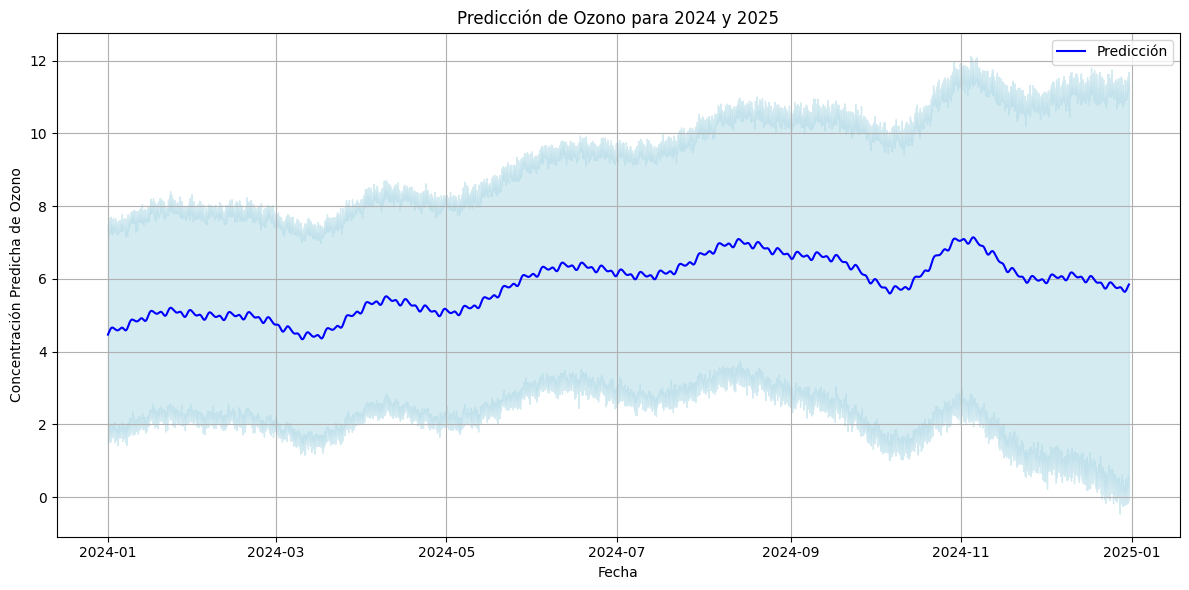

Predicciones para 2024 de Ozono
                        ds      yhat  yhat_lower  yhat_upper
122688 2024-01-01 00:00:00  4.463980    1.462531    7.512943
122689 2024-01-01 01:00:00  4.470672    1.647485    7.316556
122690 2024-01-01 02:00:00  4.477599    1.757448    7.202781
122691 2024-01-01 03:00:00  4.484733    1.776335    7.392594
122692 2024-01-01 04:00:00  4.492067    1.732418    7.336110


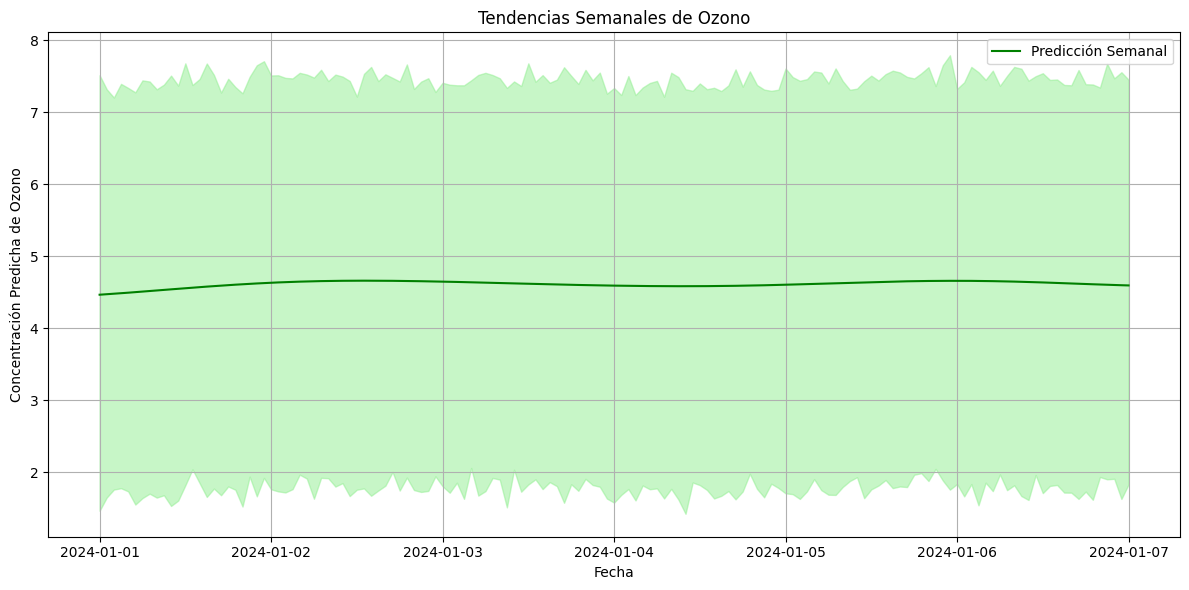

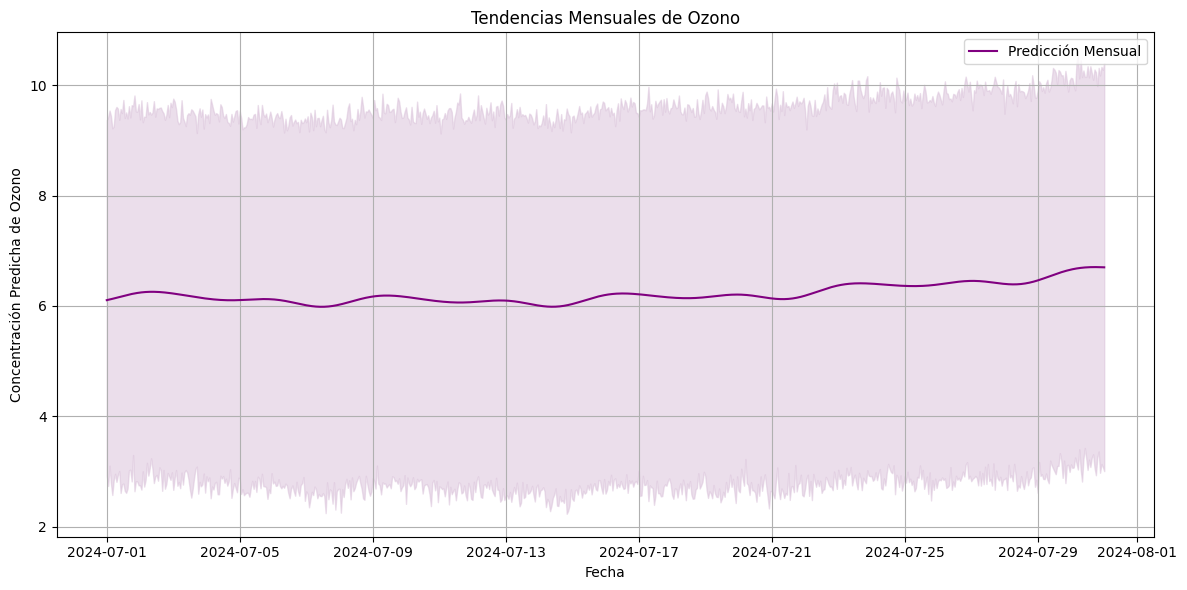

In [38]:
forecastozono = pd.read_csv('/Users/toniamayaobrador/Desktop/Visualizaciones/forecastozono.csv')

# Convertir la columna 'ds' a tipo datetime
forecastozono['ds'] = pd.to_datetime(forecastoxido['ds'])

# Filtrar los datos para mostrar solo 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024 & 2025]

# Visualizar las predicciones solo para 2024
plt.figure(figsize=(12, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Predicción', color='blue')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='lightblue', alpha=0.5)
plt.title('Predicción de Ozono para 2024 y 2025')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Ozono')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir algunas predicciones para verificación
print("Predicciones para 2024 de Ozono")
print(forecast_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


# Graficar una semana típica para ver las tendencias diarias
plt.figure(figsize=(12, 6))
start_date = '2024-01-01'
end_date = '2024-01-07'
week_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
plt.plot(week_data['ds'], week_data['yhat'], label='Predicción Semanal', color='green')
plt.fill_between(week_data['ds'], week_data['yhat_lower'], week_data['yhat_upper'], color='lightgreen', alpha=0.5)
plt.title('Tendencias Semanales de Ozono')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Ozono')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar un mes típico para observar las tendencias mensuales
plt.figure(figsize=(12, 6))
start_date = '2024-07-01'
end_date = '2024-07-31'
month_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
plt.plot(month_data['ds'], month_data['yhat'], label='Predicción Mensual', color='purple')
plt.fill_between(month_data['ds'], month_data['yhat_lower'], month_data['yhat_upper'], color='thistle', alpha=0.5)
plt.title('Tendencias Mensuales de Ozono')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Ozono')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

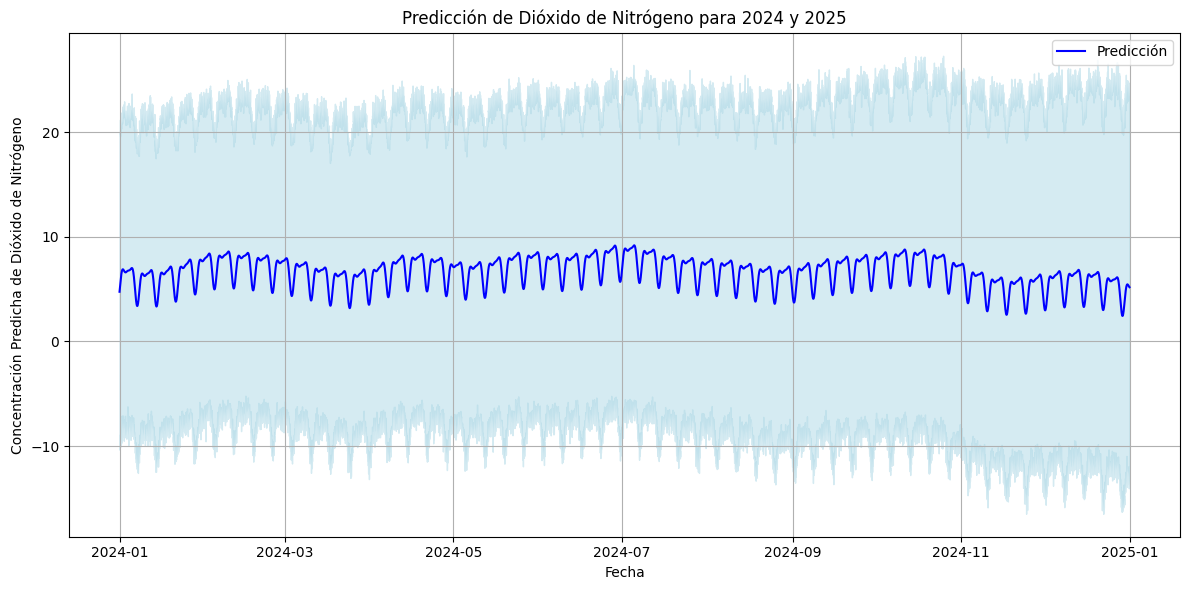

Predicciones para 2024 y 2025 de Dióxido de Nitrógeno
                        ds      yhat  yhat_lower  yhat_upper
122688 2024-01-01 00:00:00  4.745832  -10.078956   19.953373
122689 2024-01-01 01:00:00  4.856780  -10.345109   19.849537
122690 2024-01-01 02:00:00  4.970918   -9.467477   19.947915
122691 2024-01-01 03:00:00  5.087373   -8.945801   19.929181
122692 2024-01-01 04:00:00  5.205055   -8.873944   21.190005


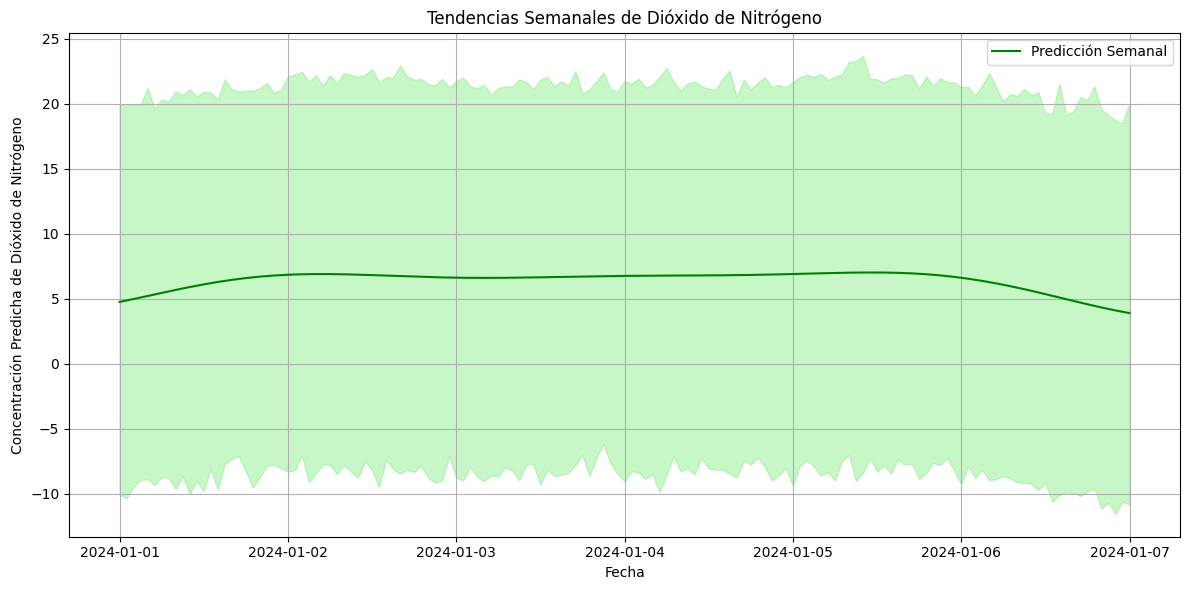

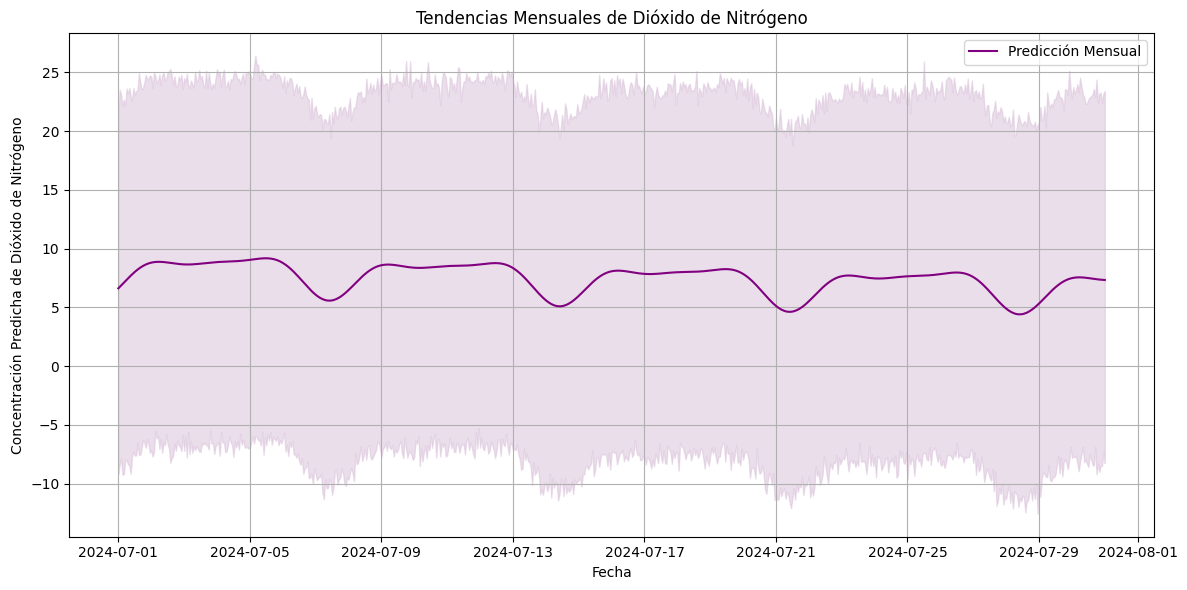

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
forecastdioxidonitrogeno = pd.read_csv('/Users/toniamayaobrador/Desktop/Visualizaciones/forecastdioxidonitrogeno.csv.csv')

# Convertir la columna 'ds' a tipo datetime
forecastdioxidonitrogeno['ds'] = pd.to_datetime(forecastdioxidonitrogeno['ds'])

# Filtrar los datos para mostrar solo 2024
forecast_2024 = forecastdioxidonitrogeno[forecastdioxidonitrogeno['ds'].dt.year == 2024 & 2025]

# Visualizar las predicciones solo para 2024
plt.figure(figsize=(12, 6))
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Predicción', color='blue')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='lightblue', alpha=0.5)
plt.title('Predicción de Dióxido de Nitrógeno para 2024 y 2025')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Dióxido de Nitrógeno')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprimir algunas predicciones para verificación
print("Predicciones para 2024 y 2025 de Dióxido de Nitrógeno")
print(forecast_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


# Graficar una semana típica para ver las tendencias diarias
plt.figure(figsize=(12, 6))
start_date = '2024-01-01'
end_date = '2024-01-07'
week_data = forecastdioxidonitrogeno[(forecastdioxidonitrogeno['ds'] >= start_date) & (forecastdioxidonitrogeno['ds'] <= end_date)]
plt.plot(week_data['ds'], week_data['yhat'], label='Predicción Semanal', color='green')
plt.fill_between(week_data['ds'], week_data['yhat_lower'], week_data['yhat_upper'], color='lightgreen', alpha=0.5)
plt.title('Tendencias Semanales de Dióxido de Nitrógeno')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Dióxido de Nitrógeno')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar un mes típico para observar las tendencias mensuales
plt.figure(figsize=(12, 6))
start_date = '2024-07-01'
end_date = '2024-07-31'
month_data = forecastdioxidonitrogeno[(forecastdioxidonitrogeno['ds'] >= start_date) & (forecastdioxidonitrogeno['ds'] <= end_date)]
plt.plot(month_data['ds'], month_data['yhat'], label='Predicción Mensual', color='purple')
plt.fill_between(month_data['ds'], month_data['yhat_lower'], month_data['yhat_upper'], color='thistle', alpha=0.5)
plt.title('Tendencias Mensuales de Dióxido de Nitrógeno')
plt.xlabel('Fecha')
plt.ylabel('Concentración Predicha de Dióxido de Nitrógeno')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusiones Finales del Proyecto de Calidad del Aire en Palma de Mallorca

---

## Sobre los Contaminantes:

1. **Distribución Geográfica**:
   - Los niveles de contaminantes como el dióxido de azufre (SO₂) son consistentemente más altos en la estación de **Bellver**, lo que refleja la influencia del tráfico marítimo y las carreteras cercanas.
   - En **Foners**, los óxidos de nitrógeno (NO y NO₂) y las partículas PM10 presentan niveles más elevados, lo que confirma el impacto del tráfico urbano en el centro de la ciudad.

2. **Estacionalidad**:
   - El ozono (O₃) alcanza sus niveles máximos durante el verano, impulsado por la radiación solar y temperaturas altas.
   - Los meses de otoño e invierno muestran picos en partículas PM10 y SO₂, posiblemente debido a condiciones meteorológicas que favorecen la acumulación.

3. **Factores Externos**:
   - La actividad turística parece estar asociada a incrementos en contaminantes como el SO₂, especialmente en los meses de mayor afluencia.

---

## Sobre la Complejidad de los Patrones:

1. **Patrones Temporales**:
   - Los datos presentan alta variabilidad interanual, además de patrones estacionales marcados, lo que dificulta la interpretación directa sin modelos robustos.
   - Existen discrepancias en los niveles entre estaciones, lo que sugiere que los contaminantes están fuertemente influenciados por factores geográficos y actividades humanas específicas.

2. **Outliers y Varianza**:
   - La presencia de outliers y una gran varianza en los datos aumenta la dificultad para extraer conclusiones consistentes y puede estar relacionado con eventos puntuales, como días de alta actividad portuaria o condiciones meteorológicas extremas.

---

## Sobre la Complejidad de la Predicción:

1. **Limitaciones de Modelos Clásicos**:
   - Los modelos clásicos de aprendizaje supervisado no lograron capturar la complejidad de los patrones de los datos, mostrando métricas de desempeño insuficientes (R² negativos).

2. **Deep Learning y Modelos Avanzados**:
   - Los enfoques de **deep learning** como LSTM, GRU y Transformer ofrecieron una mejora marginal, pero no lo suficiente como para ser útiles en producción.
   - **Prophet**, un modelo estadístico adaptado a series temporales, resultó ser la herramienta más confiable y fácil de interpretar.

3. **Desafíos de los Datos**:
   - La imputación de datos faltantes y la presencia de outliers, aunque abordados correctamente, añaden un nivel de complejidad adicional al proceso de predicción.
   - La integración de 10 años de datos históricos fue clave para mejorar los resultados, pero también incrementó la necesidad de una infraestructura computacional robusta.

---

## Otros Aspectos Relevantes:

1. **Implicaciones para la Toma de Decisiones**:
   - Los insights obtenidos pueden ser útiles para diseñar estrategias de mitigación de contaminación, especialmente en zonas como el puerto y el centro urbano.
   - Las empresas pueden aprovechar esta información para iniciativas de **responsabilidad social corporativa**, como la reducción de emisiones o la implementación de tecnologías más limpias.

2. **Futuras Direcciones**:
   - Incorporar datos externos, como meteorología detallada, tráfico marítimo y vehicular, podría mejorar significativamente los modelos de predicción.
   - Experimentar con enfoques híbridos que combinen técnicas estadísticas y de machine learning puede ser una estrategia prometedora.
   - Explorar arquitecturas de deep learning más específicas para series temporales, como TCN (Temporal Convolutional Networks), podría ofrecer una alternativa interesante.

---

En resumen, este proyecto ha permitido obtener una visión integral de la calidad del aire en Palma de Mallorca, resaltando las diferencias geográficas y temporales en los contaminantes. Aunque los desafíos en la predicción fueron significativos, los resultados y conclusiones proporcionan un punto de partida sólido para futuras investigaciones y decisiones estratégicas.
